# Installation

In [1]:
!pip install catboost==1.2.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


## 📝 Problem Statement

---

🔹 **Objective:**  
We aim to uncover the key factors that lead to **employee attrition**. By identifying these factors, we can better understand why employees leave the organization and take proactive steps to improve retention.

---

🔹 **Dataset:**  
The dataset used for this analysis is **IBM HR Analytics**, which contains various employee-related factors such as:
- **Age**  
- **Department**  
- **Travel Frequency**  
- And many more…

---

🔹 **Type of Problem:**  
This is a **classification problem**, where the target variable is **attrition** (whether an employee leaves or stays).

---


# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from IPython.display import display, Markdown, HTML

import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# Basic data understanding

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Employee Attrition Dataset - Column Explanation with Feature Types

This dataset contains employee-level information used for analyzing and predicting **employee attrition**. Below is a detailed breakdown of each column with feature types:

---

## 📌 Employee Information & Demographics

| Column          | Description                                    | Feature Type     |
|-----------------|------------------------------------------------|------------------|
| `Age`           | Age of the employee                            | Numerical        |
| `Gender`        | Gender of the employee (Male/Female)           | Categorical      |
| `MaritalStatus` | Marital status (Single, Married, etc.)         | Categorical      |
| `Over18`        | Whether the employee is over 18 (usually "Y")  | Constant         |

---

## 📌 Attrition (Target Variable)

| Column      | Description                                         | Feature Type     |
|-------------|-----------------------------------------------------|------------------|
| `Attrition` | Whether the employee has left the company (`Yes`/`No`) | Categorical (Target) |

---

## 📌 Job & Role Information

| Column             | Description                                                   | Feature Type     |
|--------------------|---------------------------------------------------------------|------------------|
| `JobRole`          | Employee’s job title (e.g., Sales Executive, Research Scientist) | Categorical      |
| `Department`       | Department of the employee (e.g., Sales, R&D)                 | Categorical      |
| `BusinessTravel`   | Frequency of business travel (Rarely, Frequently, etc.)       | Categorical feature with ordinal meaning     |
| `JobLevel`         | Job seniority level (1 = entry-level)                         | Ordinal          |
| `JobInvolvement`   | Engagement in job (scale 1–4)                                 | Ordinal          |
| `JobSatisfaction`  | Job satisfaction level (scale 1–4)                            | Ordinal          |
| `PerformanceRating`| Performance score (usually 1–4)                               | Ordinal          |
| `StockOptionLevel` | Level of stock options (0–3)                                  | Ordinal          |
| `PercentSalaryHike`| Last salary hike percentage                                   | Numerical        |


**🔢 JobInvolvement Mapping:**  
1 = Low, 2 = Medium, 3 = High, 4 = Very High

**🔢 JobSatisfaction Mapping:**  
1 = Low, 2 = Medium, 3 = High, 4 = Very High

**🔢 PerformanceRating Mapping:**  
1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding


---

## 📌 Education

| Column           | Description                                              | Feature Type     |
|------------------|----------------------------------------------------------|------------------|
| `Education`      | Education level (1–5; 1 = Below College, 5 = Doctor)     | Ordinal          |
| `EducationField` | Field of study (Life Sciences, Medical, etc.)            | Categorical      |


**🎓 Education Mapping:**  
1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor


---

## 📌 Work History & Experience

| Column                  | Description                                    | Feature Type     |
|-------------------------|------------------------------------------------|------------------|
| `TotalWorkingYears`     | Total years of professional experience         | Numerical        |
| `YearsAtCompany`        | Years at the current company                   | Numerical        |
| `YearsInCurrentRole`    | Years in the current job role                  | Numerical        |
| `YearsSinceLastPromotion`| Years since last promotion                   | Numerical        |
| `YearsWithCurrManager`  | Years with current manager                     | Numerical        |
| `NumCompaniesWorked`    | Number of previous companies worked for        | Numerical        |

---

## 📌 Work-Life Balance & Environment

| Column                   | Description                                   | Feature Type     |
|--------------------------|-----------------------------------------------|------------------|
| `WorkLifeBalance`        | Work-life balance rating (1–4)                | Ordinal          |
| `EnvironmentSatisfaction`| Satisfaction with work environment (1–4)      | Ordinal          |
| `OverTime`               | Whether the employee works overtime           | Categorical      |
| `TrainingTimesLastYear`  | Training sessions attended last year          | Numerical        |


**🌱 EnvironmentSatisfaction Mapping:**  
1 = Low, 2 = Medium, 3 = High, 4 = Very High

**⚖️ WorkLifeBalance Mapping:**  
1 = Bad, 2 = Good, 3 = Better, 4 = Best

**❤️ RelationshipSatisfaction Mapping:**  
1 = Low, 2 = Medium, 3 = High, 4 = Very High


---

## 📌 Compensation

| Column         | Description                                | Feature Type     |
|----------------|--------------------------------------------|------------------|
| `MonthlyIncome`| Monthly salary                             | Numerical        |
| `MonthlyRate`  | Monthly rate (may differ from base income) | Numerical        |
| `HourlyRate`   | Hourly wage                                | Numerical        |
| `DailyRate`    | Daily wage                                 | Numerical        |

---

## 📌 Technical/Internal Info

| Column           | Description                              | Feature Type     |
|------------------|------------------------------------------|------------------|
| `EmployeeNumber` | Unique identifier for each employee      | Categorical (ID) |
| `EmployeeCount`  | Constant value (likely always 1)         | Constant         |
| `StandardHours`  | Standard working hours (e.g., 80)        | Constant         |

---

## ✅ Summary

This dataset is ideal for building a **classification model to predict employee attrition**. It includes a variety of feature types:
- **Categorical** (e.g., Gender, JobRole)
- **Numerical** (e.g., Age, MonthlyIncome)
- **Ordinal** (e.g., JobSatisfaction, PerformanceRating)
- **Constant/ID Columns** (e.g., EmployeeNumber, StandardHours)

---


In [4]:
len(df)

1470

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
cols = df.columns
for col in cols:
    print(f"{col} = {df[col].nunique()}")

Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EmployeeNumber = 1470
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 9
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
StockOptionLevel = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


### Observations

* we can see that there is no null value in any of the column
* There are multiple columns that are useless (EmployeeCount ,EmployeeNumber ,Over18 ,StandardHours )

# divide data set into train,val and test

In [7]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']



Split into Training , validation and test Set (e.g., 80% train, 10% val , 10% test)

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40, stratify=y_temp)

### pre-processing removing useless columns

In [9]:
X_train = X_train.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
X_val   = X_val.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
X_test  = X_test.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# EDA

In [10]:
y_train.value_counts()

Attrition
No     986
Yes    190
Name: count, dtype: int64

### Observation

* We can see here the dataset is highly imbalanced, so recall, precesion, AUC and F1-score can be used as metrics

## For analysis purpose we are doing some data manupulation on copy of training dataset

In [11]:
X_train_copy = X_train.copy()

In [12]:

# Define the mapping dictionaries
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

environment_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_involvement_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

performance_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

relationship_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Apply the mappings to the respective columns
X_train_copy['Education']                = X_train_copy['Education'].map(education_map)
X_train_copy['EnvironmentSatisfaction']  = X_train_copy['EnvironmentSatisfaction'].map(environment_satisfaction_map)
X_train_copy['JobInvolvement']           = X_train_copy['JobInvolvement'].map(job_involvement_map)
X_train_copy['JobSatisfaction']          = X_train_copy['JobSatisfaction'].map(job_satisfaction_map)
X_train_copy['PerformanceRating']        = X_train_copy['PerformanceRating'].map(performance_rating_map)
X_train_copy['RelationshipSatisfaction'] = X_train_copy['RelationshipSatisfaction'].map(relationship_satisfaction_map)
X_train_copy['WorkLifeBalance']          = X_train_copy['WorkLifeBalance'].map(work_life_balance_map)


In [13]:
# Separate column types for X_train_copy
categorical_columns_train = X_train_copy.select_dtypes(include='object').columns.tolist()
numerical_columns_train = X_train_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_columns_train

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

### Defining plotting functions

In [14]:

def bar_plot(x_dataframe, y_dataframe, column):
    combined_df = x_dataframe.copy()
    combined_df['Target'] = y_dataframe

    ratio_dict = dict()
    # Get consistent category order based on frequency
    category_order = x_dataframe[column].value_counts().index.tolist()

    for value in category_order:
        yes_count = len(combined_df[(combined_df["Target"] == "Yes") & (combined_df[column] == value)])
        no_count = len(combined_df[(combined_df["Target"] == "No") & (combined_df[column] == value)])
        ratio = no_count / yes_count if yes_count != 0 else float('inf')
        ratio_dict[value] = ratio

    # --- First Plot: Count Plot with Percentages ---
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=combined_df, x=column, hue='Target', order=category_order)

    total = len(combined_df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = '{:.1f}%'.format(100 * height / total)
            x = p.get_x() + p.get_width() / 2.
            y = height
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.title(f'{column} vs Target with Percentages')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # --- Second Plot: Ratio of No/Yes ---
    plt.figure(figsize=(10, 6))
    ordered_ratios = [ratio_dict[key] for key in category_order]

    sns.barplot(x=category_order, y=ordered_ratios, palette='viridis')
    plt.title(f'Ratio of No/Yes for {column}')
    plt.xlabel(column)
    plt.ylabel('Ratio (No / Yes)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



def stacked_bar_plot(x_dataframe, y_dataframe, column):
    combined_df = x_dataframe.copy()
    combined_df['Target'] = y_dataframe


    ratio_dict = dict()
    # Get consistent category order based on frequency
    category_order = x_dataframe[column].value_counts().index.tolist()

    for value in category_order:
        yes_count = len(combined_df[(combined_df["Target"] == "Yes") & (combined_df[column] == value)])
        no_count = len(combined_df[(combined_df["Target"] == "No") & (combined_df[column] == value)])
        ratio = no_count / yes_count if yes_count != 0 else float('inf')
        ratio_dict[value] = ratio


    # Prepare the data
    counts = combined_df.groupby([column, 'Target']).size().unstack(fill_value=0)
    counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]  # Sort by total count

    # Calculate percentages for annotations
    total_counts = counts.sum(axis=1)
    percent_yes = (counts['Yes'] / total_counts * 100).fillna(0)
    percent_no = (counts['No'] / total_counts * 100).fillna(0)

    # Plot
    plt.figure(figsize=(10, 6))
    bottom_bar = plt.bar(counts.index, counts['Yes'], label='Yes')
    top_bar = plt.bar(counts.index, counts['No'], bottom=counts['Yes'], label='No')

    # Add percentage labels
    for i, (yes, no) in enumerate(zip(counts['Yes'], counts['No'])):
        total = yes + no
        if yes > 0:
            plt.text(i, yes / 2, f'{percent_yes.iloc[i]:.1f}%', ha='center', va='center', color='white', fontsize=10)
        if no > 0:
            plt.text(i, yes + no / 2, f'{percent_no.iloc[i]:.1f}%', ha='center', va='center', color='white', fontsize=10)

    plt.title(f'Stacked Bar Plot of {column} vs Attrition')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()


    # # --- Second Plot: Ratio of No/Yes ---
    # plt.figure(figsize=(10, 6))
    # ordered_ratios = [ratio_dict[key] for key in category_order]

    # sns.barplot(x=category_order, y=ordered_ratios, palette='viridis')
    # plt.title(f'Ratio of No/Yes for {column}')
    # plt.xlabel(column)
    # plt.ylabel('Ratio (No / Yes)')
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.show()


def vilon_plot(x_dataframe, y_dataframe, column):

    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=train_df, x="Attrition", y=col, palette={"Yes": "salmon", "No": "skyblue"}, bw_adjust=0.5, cut=0, hue="Attrition", legend=False)
    plt.title(f"{column} vs Attrition (Train Set)")
    plt.tight_layout()
    plt.show()


def box_plot(x_dataframe, y_dataframe, column):

    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x="Attrition", y=column, palette={"Yes": "salmon", "No": "skyblue"}, hue="Attrition", legend=False)
    plt.title(f"{column} vs Attrition (Train Set)")
    plt.xlabel("Attrition")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=x_dataframe, y=column)
    plt.title(f"Distribution of {column} (Train Set)")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


def overlaid_pdf_plot(x_dataframe, y_dataframe, column):
    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=train_df, x=column, hue="Attrition", fill=False, palette={"Yes": "salmon", "No": "skyblue"}, common_norm=False)
    plt.title(f"{column} vs Attrition (Train Set)")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


def box_violin_plot(x_dataframe, y_dataframe, column):
    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(data=train_df, x="Attrition", y=column, palette={"Yes": "salmon", "No": "skyblue"})
    plt.title(f"{column} - Box Plot")



    plt.subplot(1, 3, 2)
    sns.violinplot(data=train_df, x="Attrition", y=column, palette={"Yes": "salmon", "No": "skyblue"})
    plt.title(f"{column} - Violin Plot")


    plt.subplot(1, 3, 3)
    sns.boxplot(data=x_dataframe, y=column)
    plt.title(f"{column} - Complete Box Plot")




    plt.tight_layout()
    plt.show()


def overlaid_histogram(x_dataframe, y_dataframe, column, bins=30):
    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_df, x=column, hue="Attrition", bins=bins, stat="density", common_norm=False,
                 palette={"Yes": "salmon", "No": "skyblue"}, alpha=1)
    plt.title(f"{column} vs Attrition (Histogram)")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


def ecdf_plot(x_dataframe, y_dataframe, column):
    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(8, 4))
    for label, color in [("Yes", "salmon"), ("No", "skyblue")]:
        subset = train_df[train_df["Attrition"] == label][column]
        sorted_data = np.sort(subset)
        y_vals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
        plt.plot(sorted_data, y_vals, label=label, color=color)
    plt.xlabel(column)
    plt.ylabel("ECDF")
    plt.title(f"{column} - ECDF by Attrition")
    plt.legend()
    plt.tight_layout()
    plt.show()

def swarm_strip_plot(x_dataframe, y_dataframe, column):
    train_df = pd.concat([x_dataframe, y_dataframe], axis=1)
    plt.figure(figsize=(10, 4))

    sns.stripplot(data=train_df, x="Attrition", y=column, jitter=True, palette={"Yes": "salmon", "No": "skyblue"}, alpha=0.6)
    plt.title(f"{column} - Strip Plot")
    plt.tight_layout()
    plt.show()


def attrition_pairplot(x_dataframe, y_dataframe, columns):
    train_df = pd.concat([x_dataframe[columns], y_dataframe], axis=1)
    sns.pairplot(train_df, hue="Attrition", palette={"Yes": "salmon", "No": "skyblue"})
    plt.suptitle("Pair Plot by Attrition", y=1.02)
    plt.show()




### Analyse categorical columns


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>BusinessTravel</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


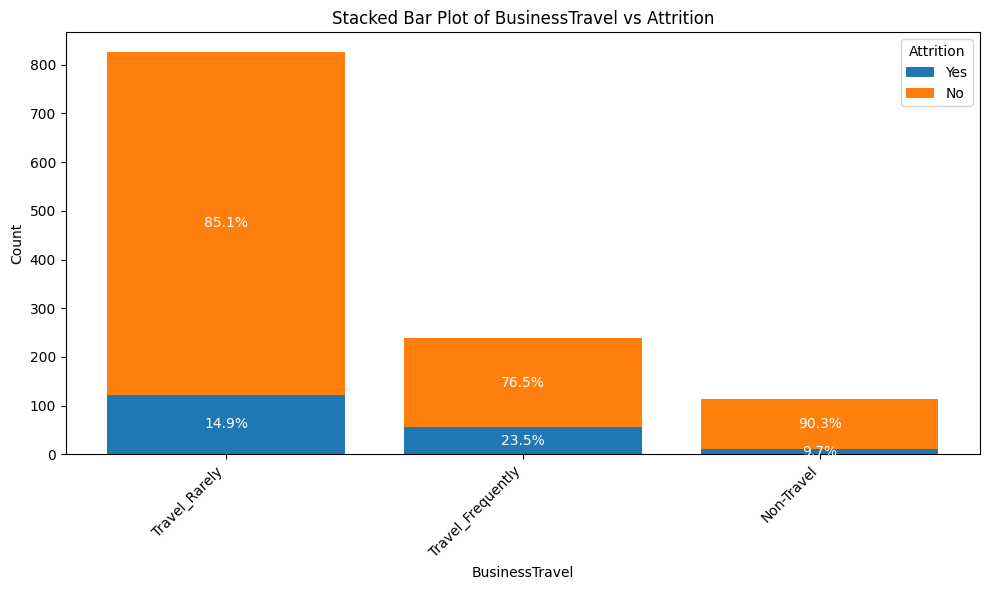


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>Department</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


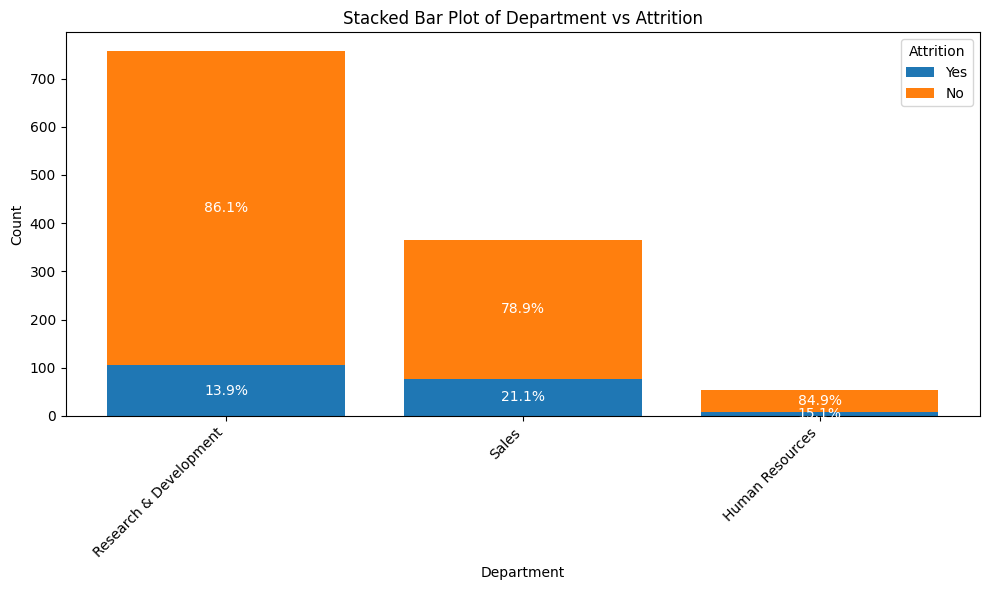


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>Education</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


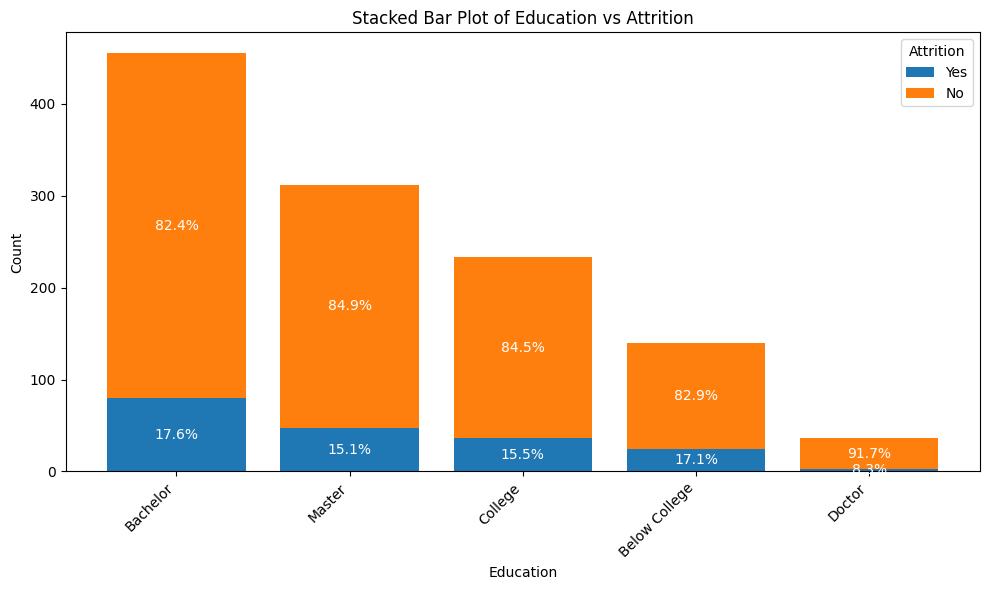


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>EducationField</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


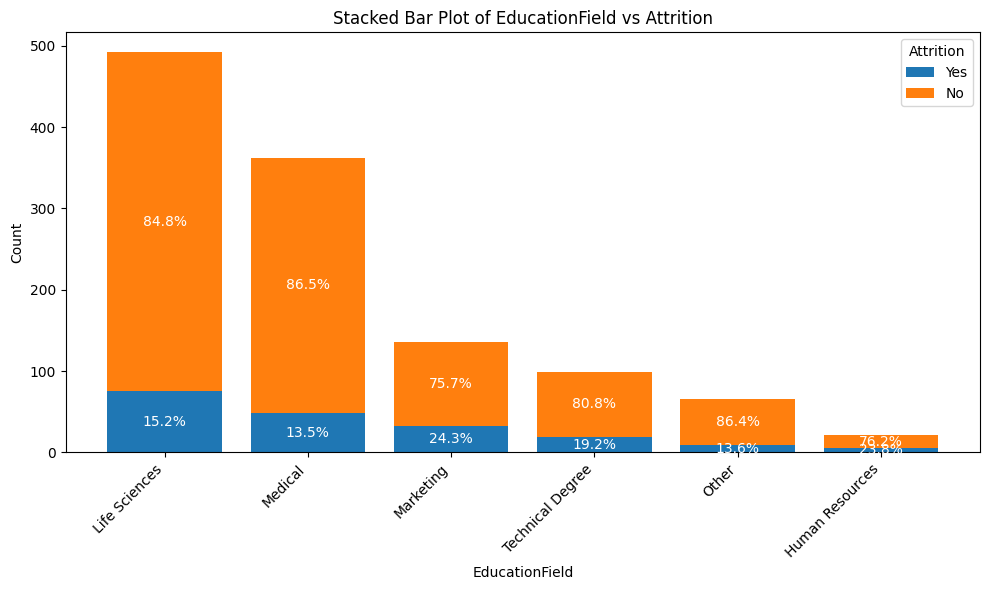


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>EnvironmentSatisfaction</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


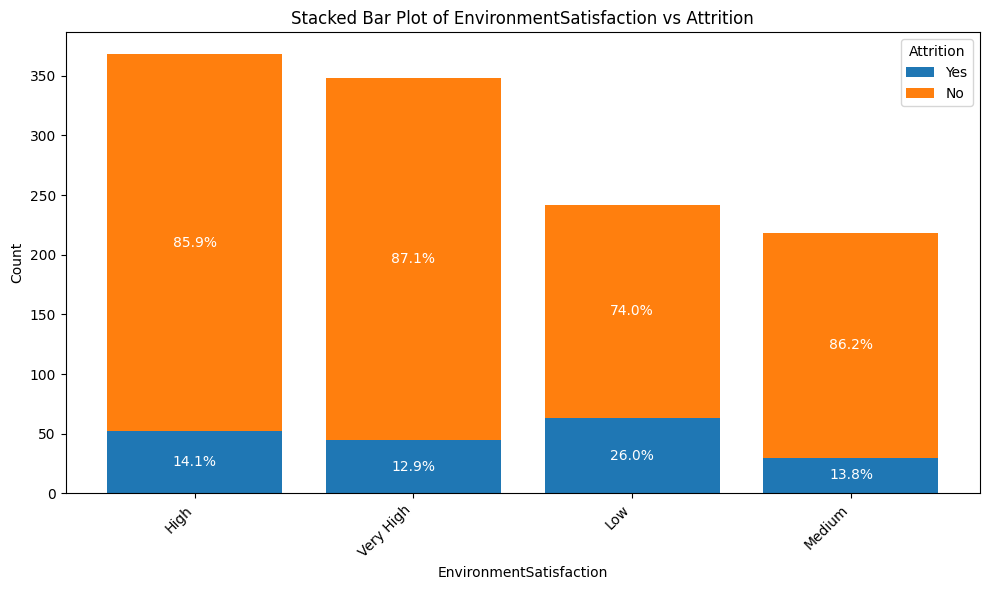


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>Gender</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


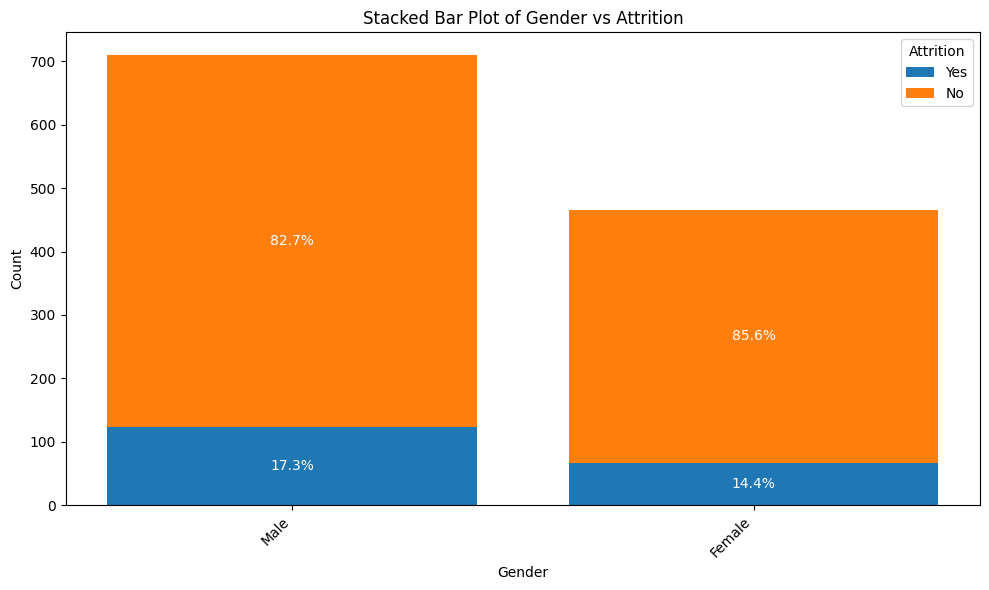


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>JobInvolvement</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


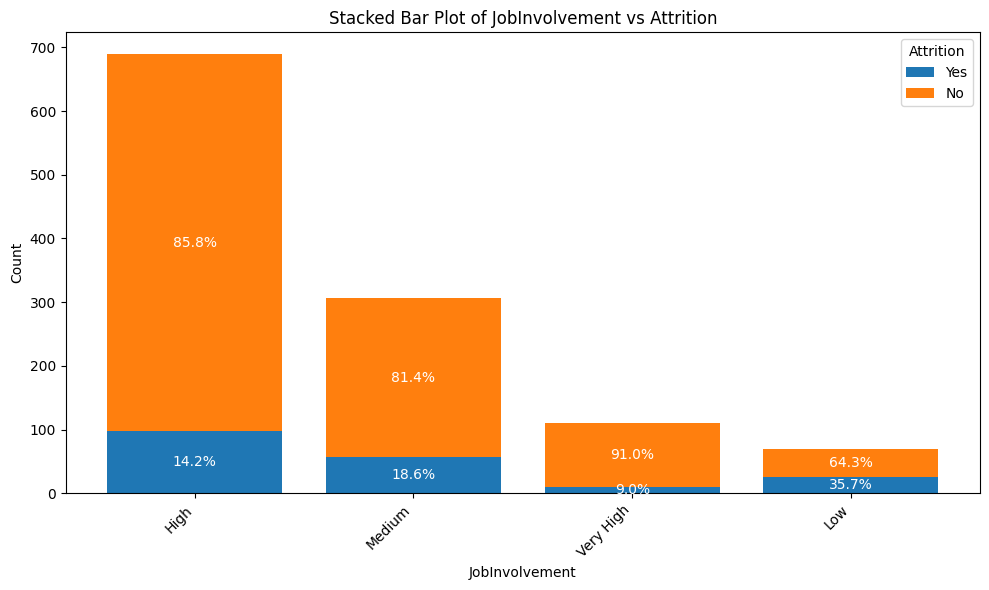


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>JobRole</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


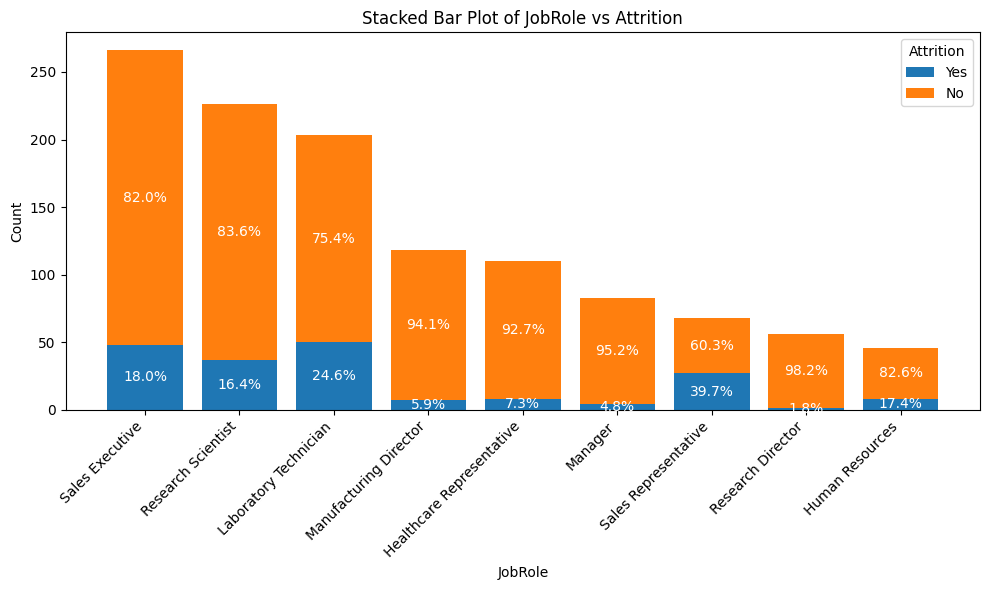


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>JobSatisfaction</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


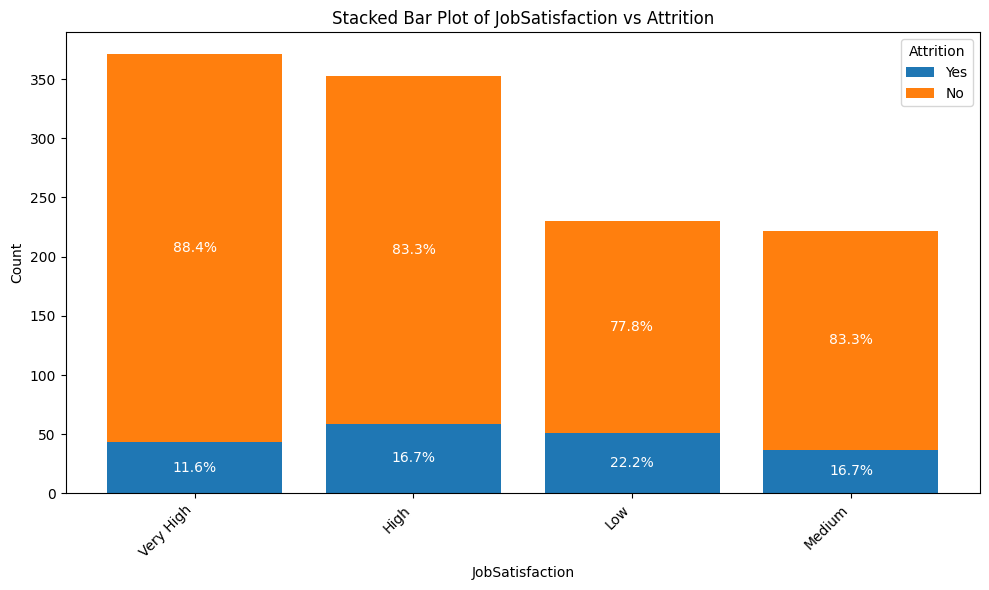


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>MaritalStatus</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


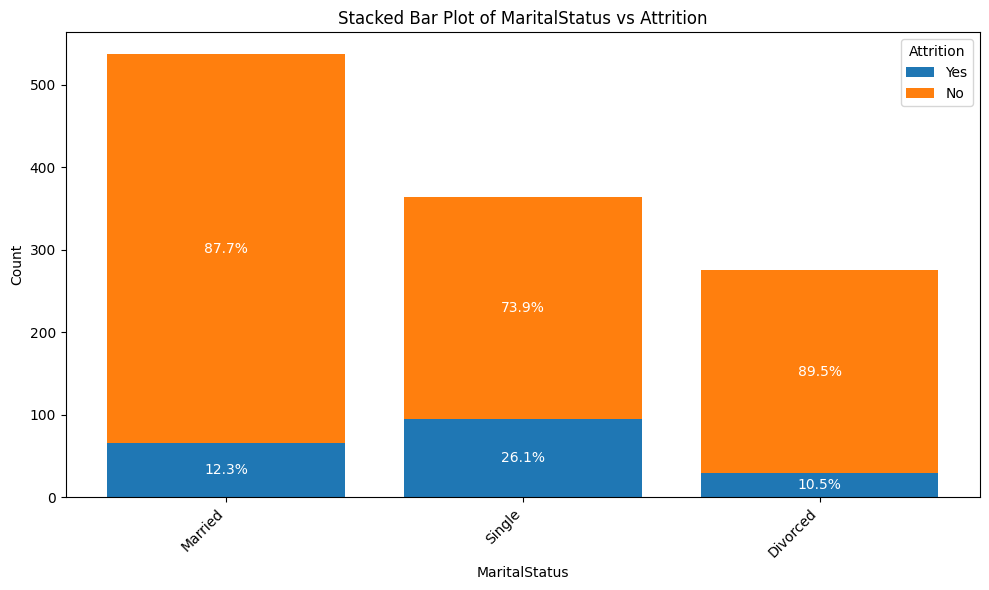


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>OverTime</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


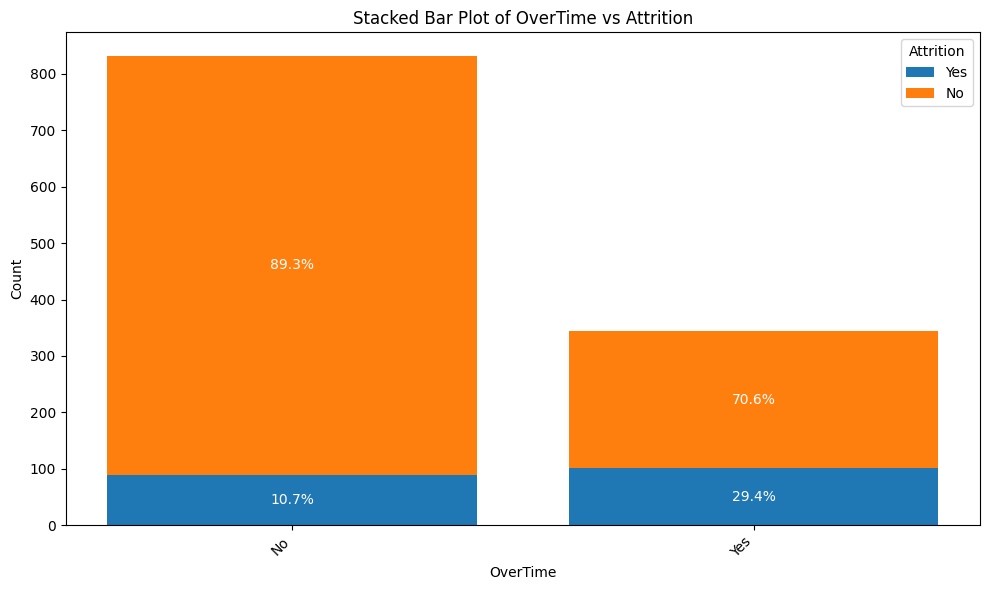


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>PerformanceRating</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


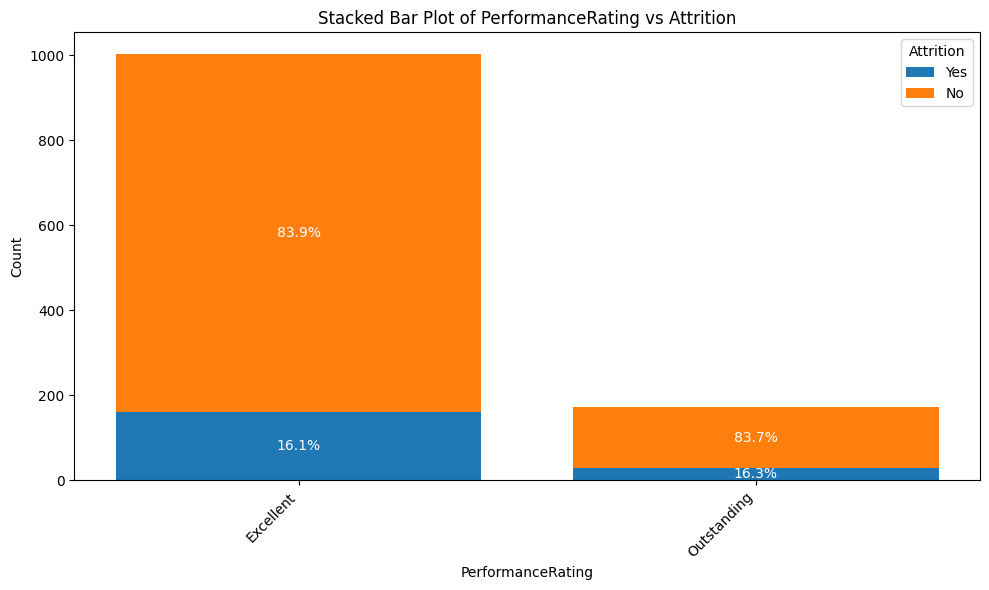


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>RelationshipSatisfaction</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


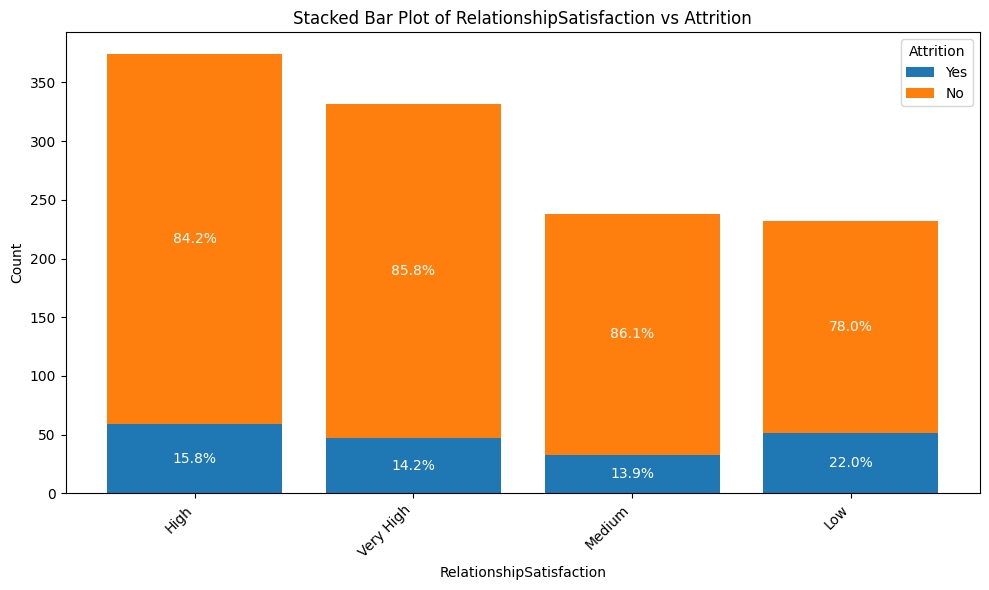


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>WorkLifeBalance</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


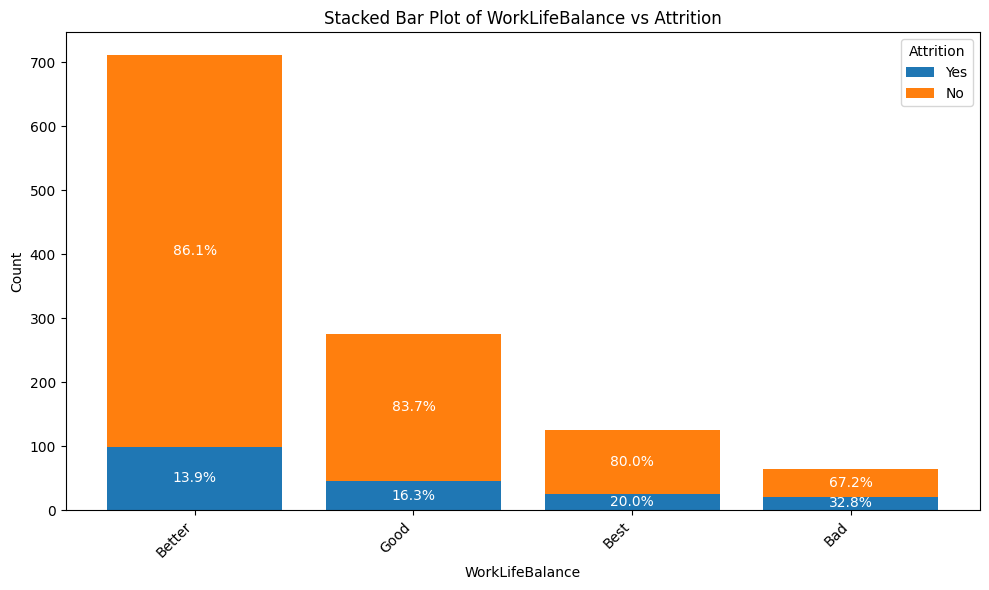

In [15]:
for categorical_column in categorical_columns_train:
    display(Markdown(f"""
<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>{categorical_column}</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>
"""))
    stacked_bar_plot(X_train_copy,y_train,categorical_column)

### 🔍 Observations on Employee Attrition

---

#### 📌 Attrition (Target Variable)
- A lower ratio of *No* to *Yes* in the attrition column indicates a higher likelihood of employees leaving the company.

---

#### 📌 Job & Role Factors
- Employees who travel frequently are more likely to leave the organization.  
- Performance ratings have minimal impact on attrition.  
- Employees in managerial or director-level roles are generally less likely to leave.  
- Staff in the *Research & Development* department show lower attrition compared to other departments.  
- Lower job involvement is associated with a higher risk of attrition.  
- Job satisfaction plays a crucial role—lower satisfaction correlates with higher attrition rates.

---

#### 📌 Education
- Employees holding a Doctorate degree tend to stay longer.  
- Those with educational backgrounds in Medical, Life Sciences, and related fields are less likely to leave compared to others.

---

#### 📌 Work-Life Balance & Work Environment
- Poor environmental satisfaction increases the chances of attrition.  
- Inadequate work-life balance is a strong predictor of attrition.  
- Employees who work overtime are significantly more likely to leave.  
- Lower relationship satisfaction with colleagues or supervisors contributes to higher attrition.

---

#### 📌 Demographic & Personal Information
- Male employees show a slightly higher attrition rate than females.  
- Single employees are considerably more likely to leave the company.



<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>Age</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


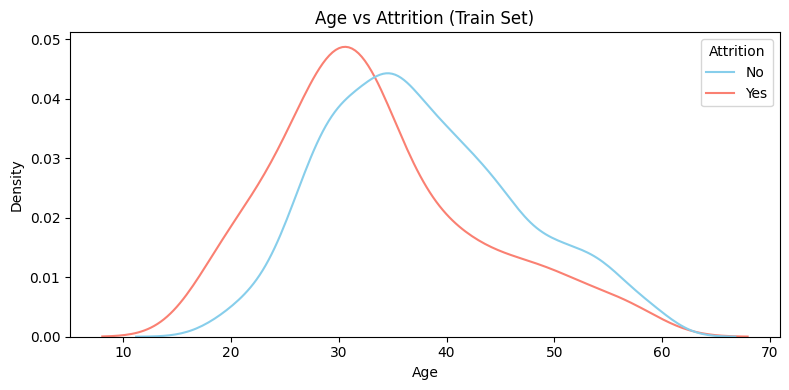

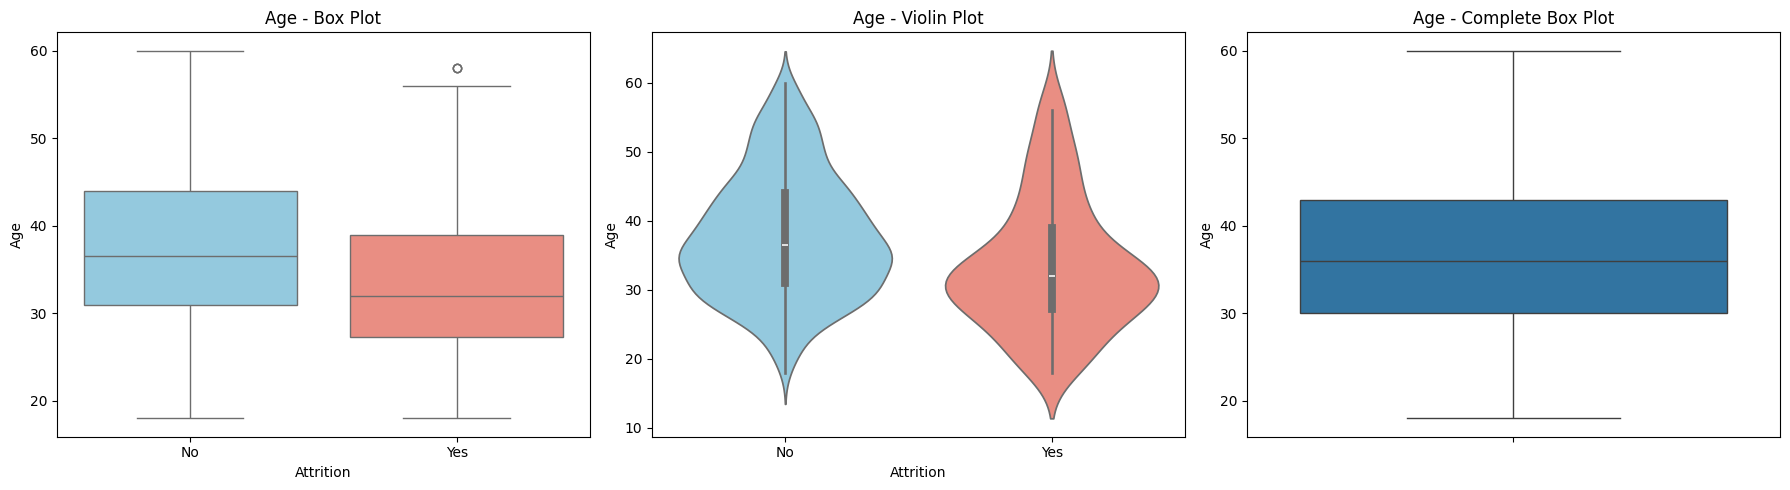


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>DailyRate</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


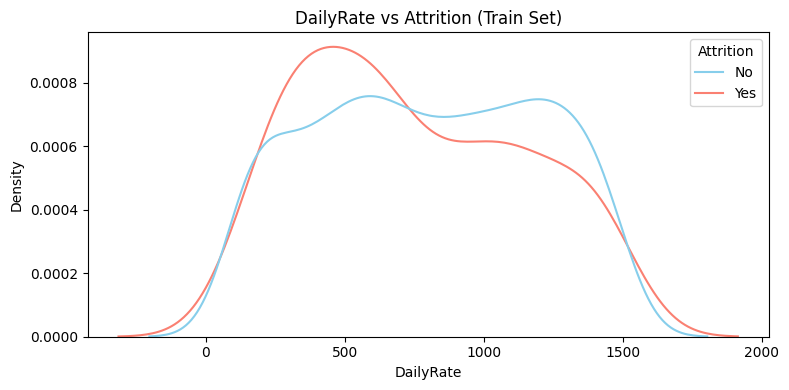

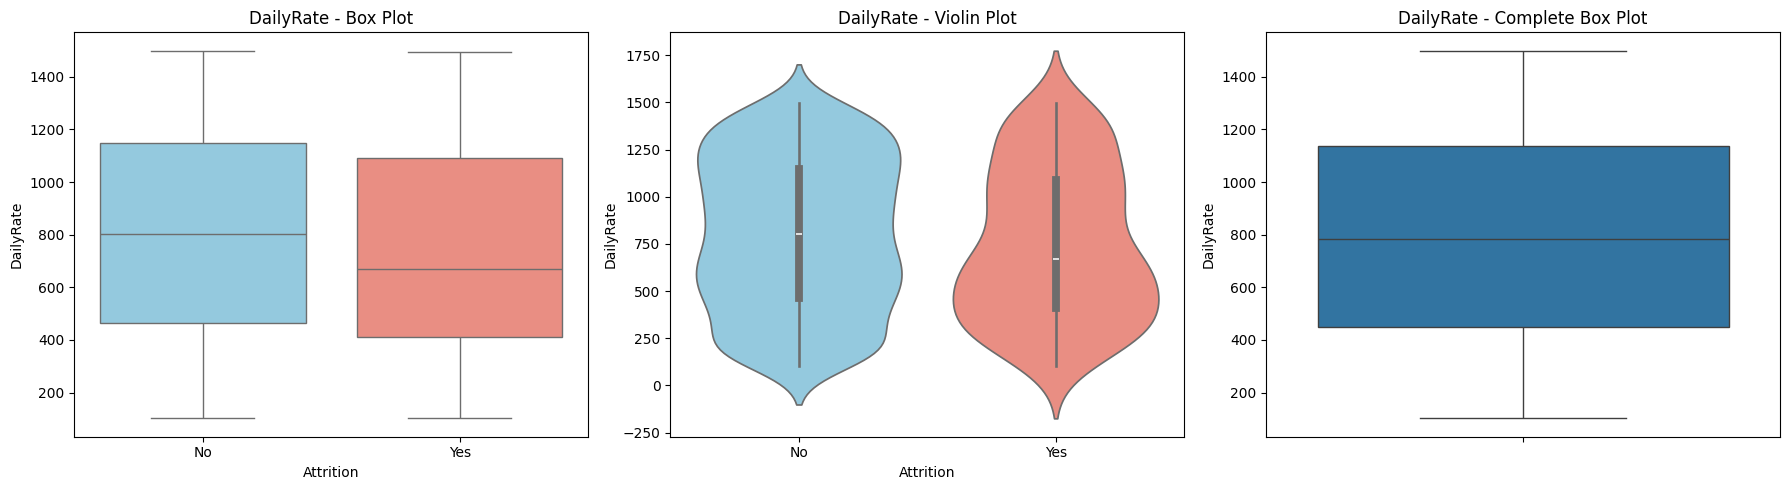


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>DistanceFromHome</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


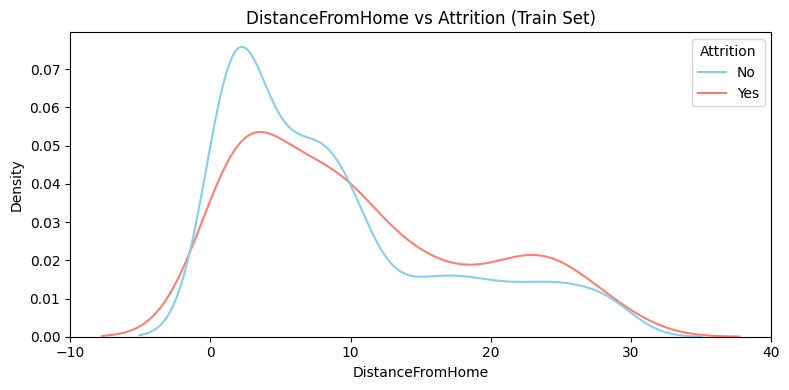

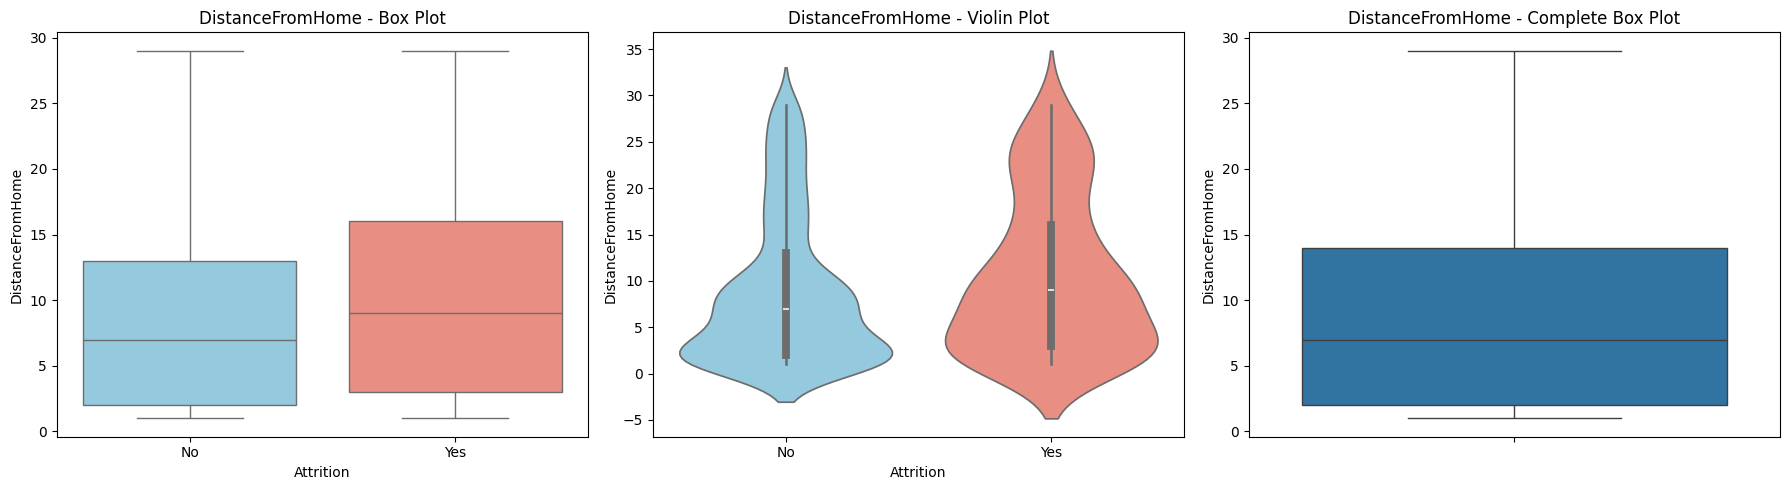


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>HourlyRate</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


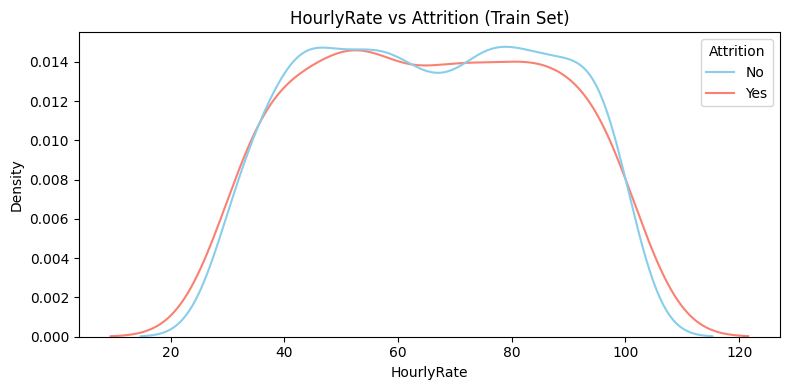

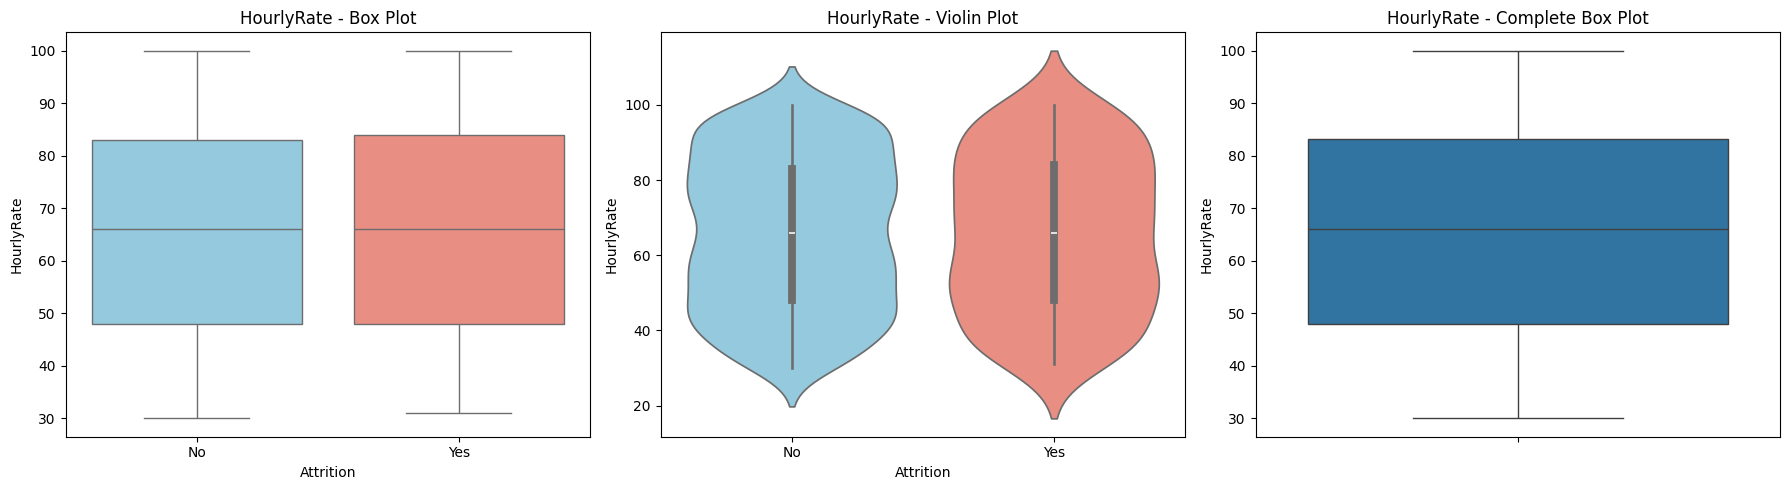


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>JobLevel</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


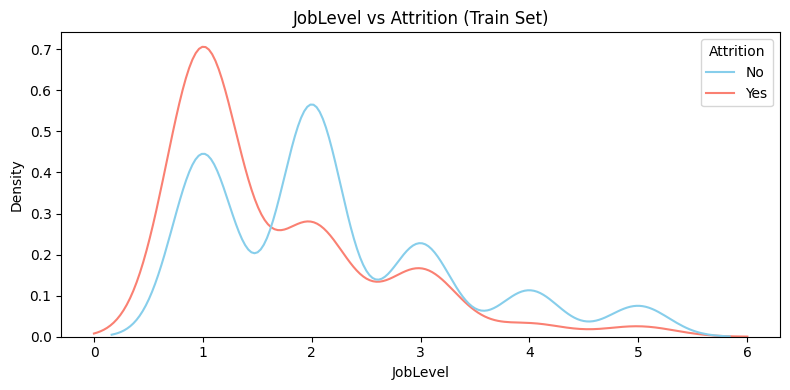

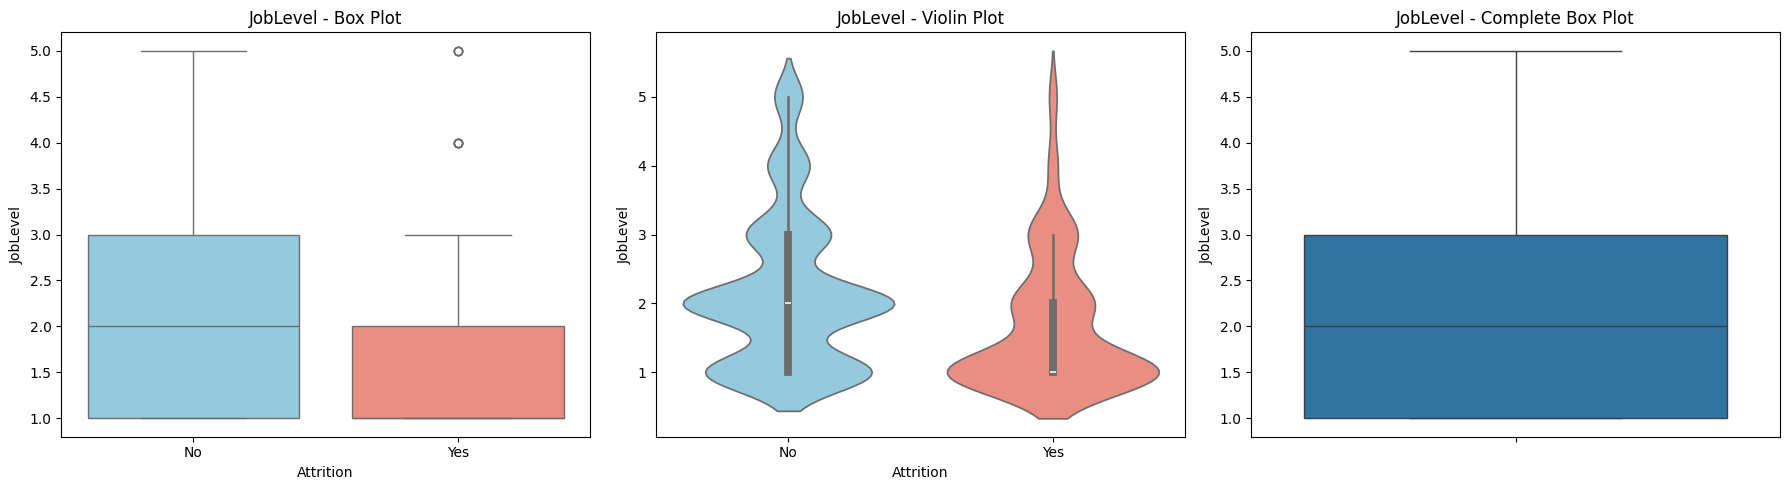


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>MonthlyIncome</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


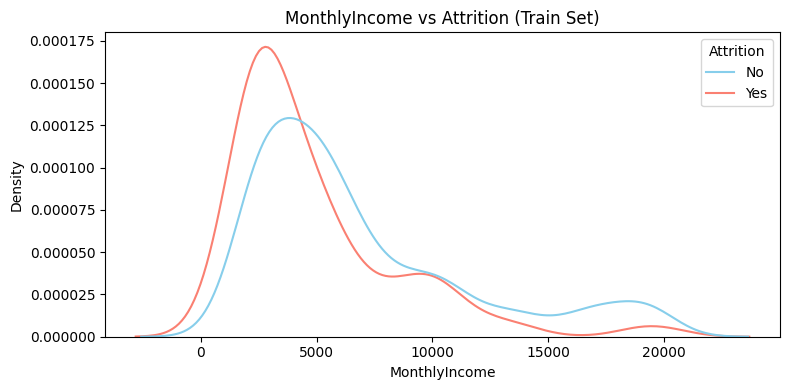

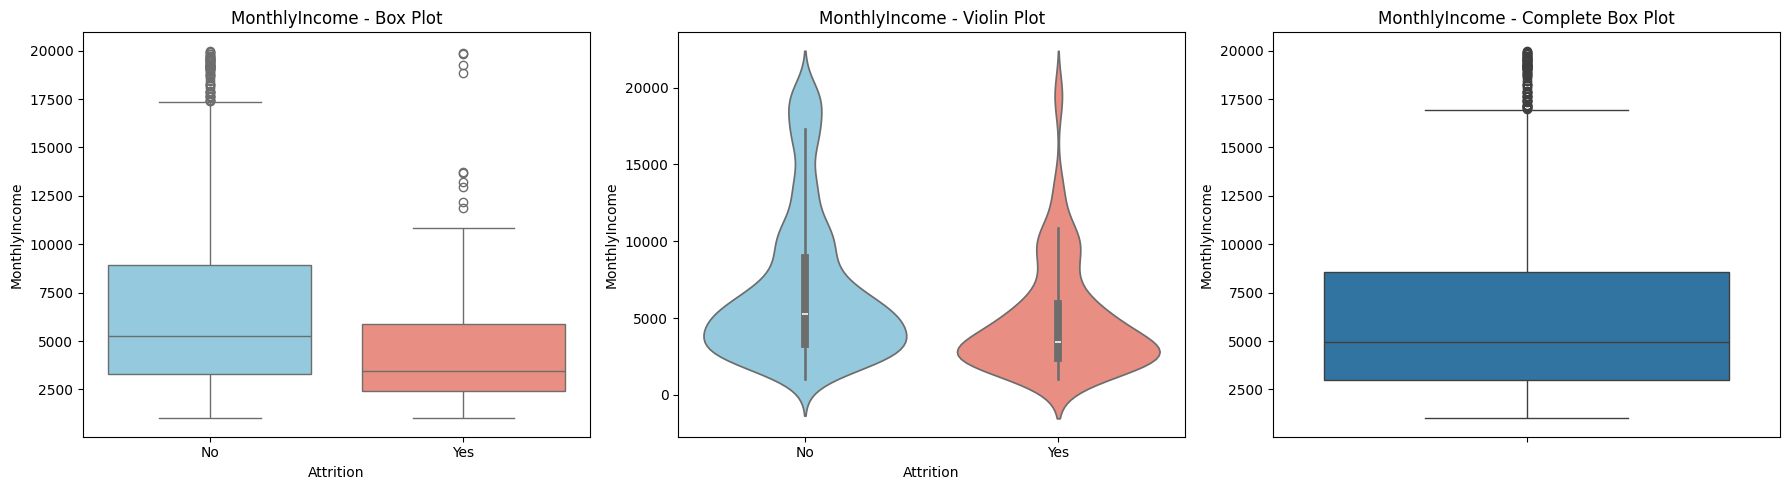


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>MonthlyRate</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


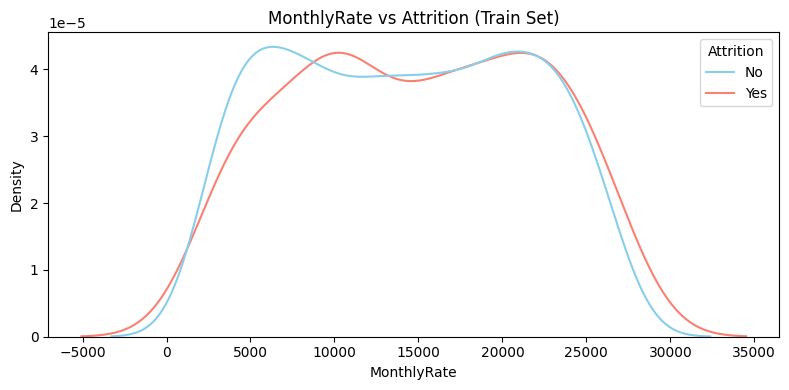

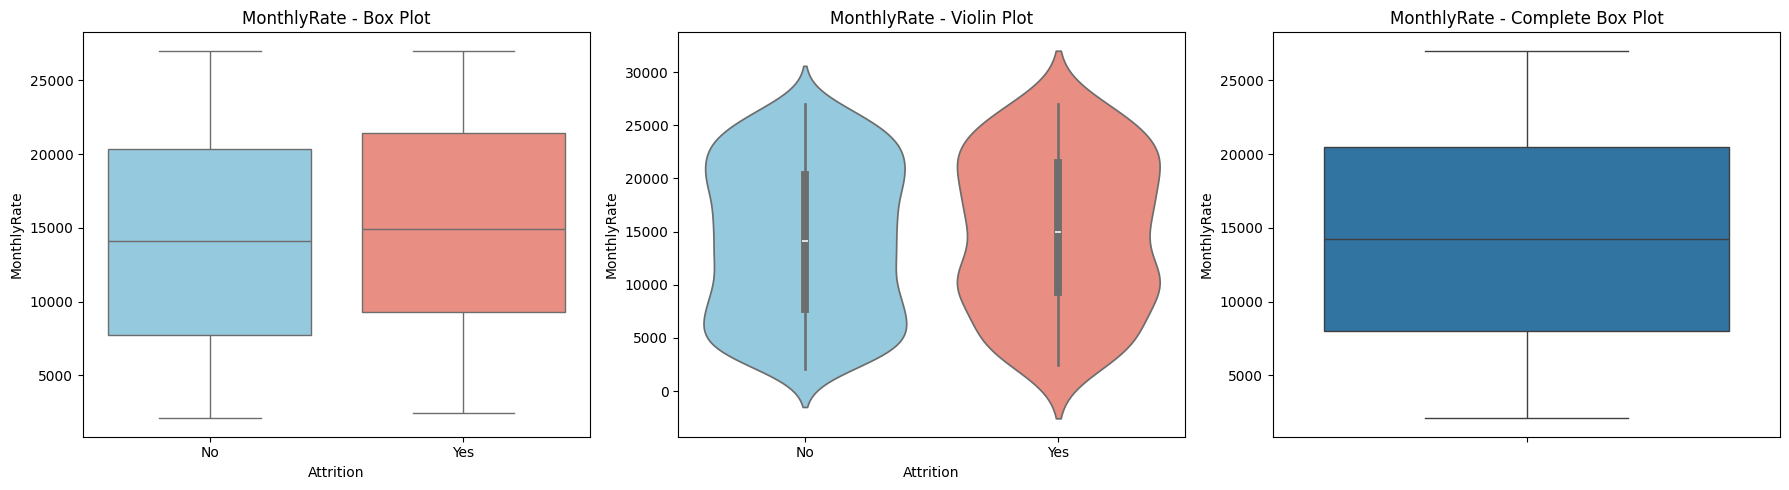


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>NumCompaniesWorked</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


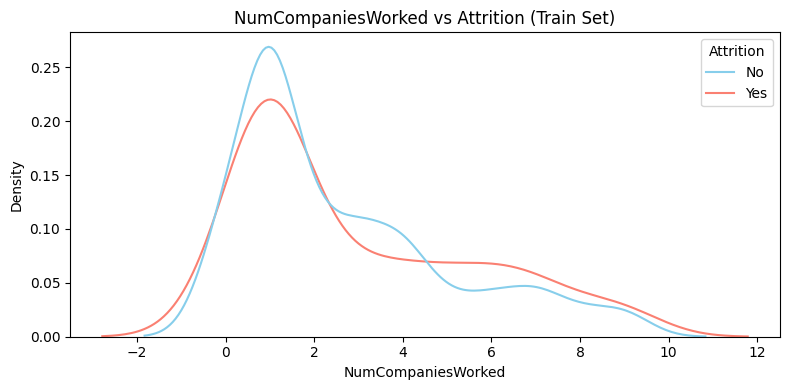

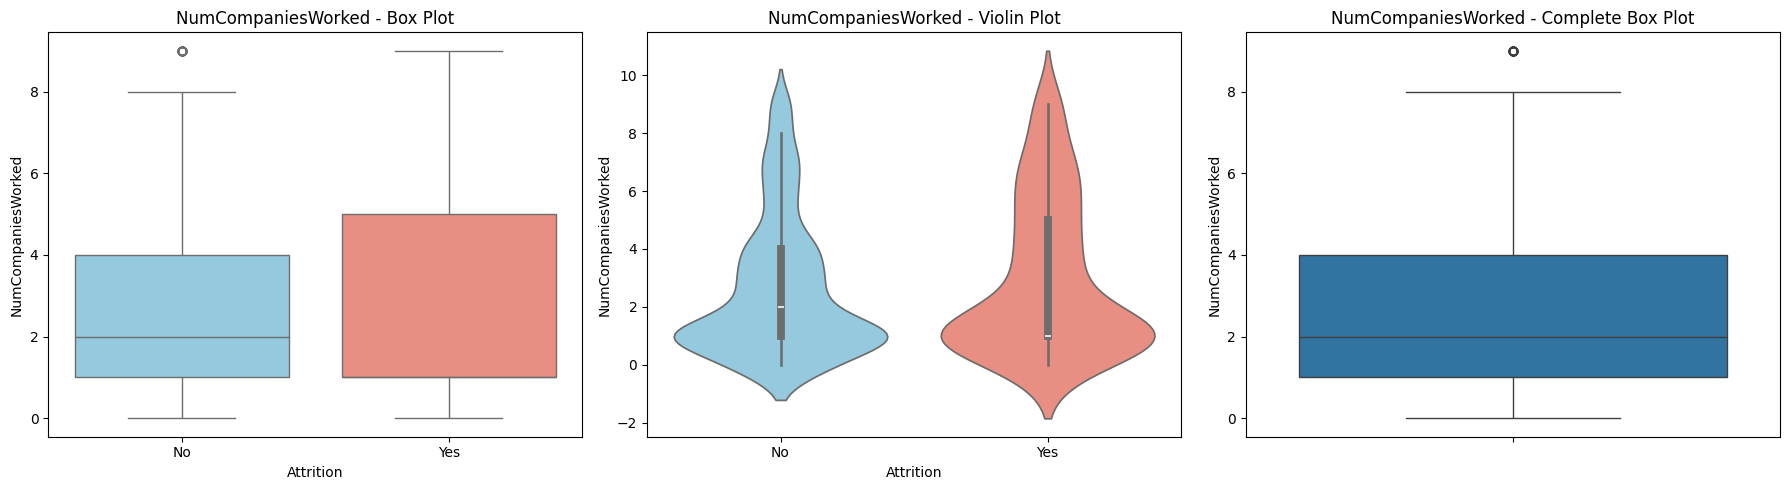


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>PercentSalaryHike</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


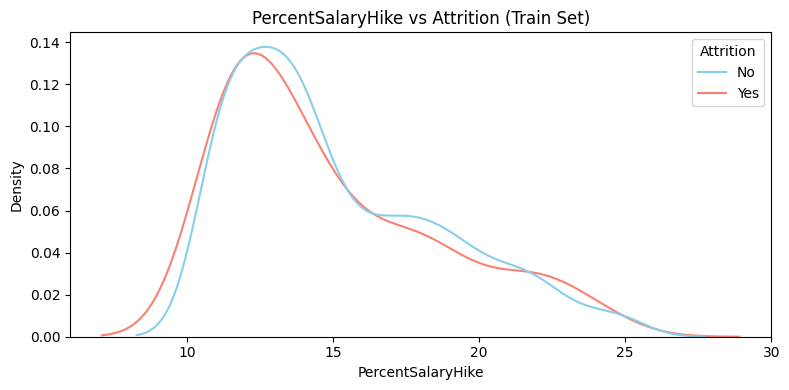

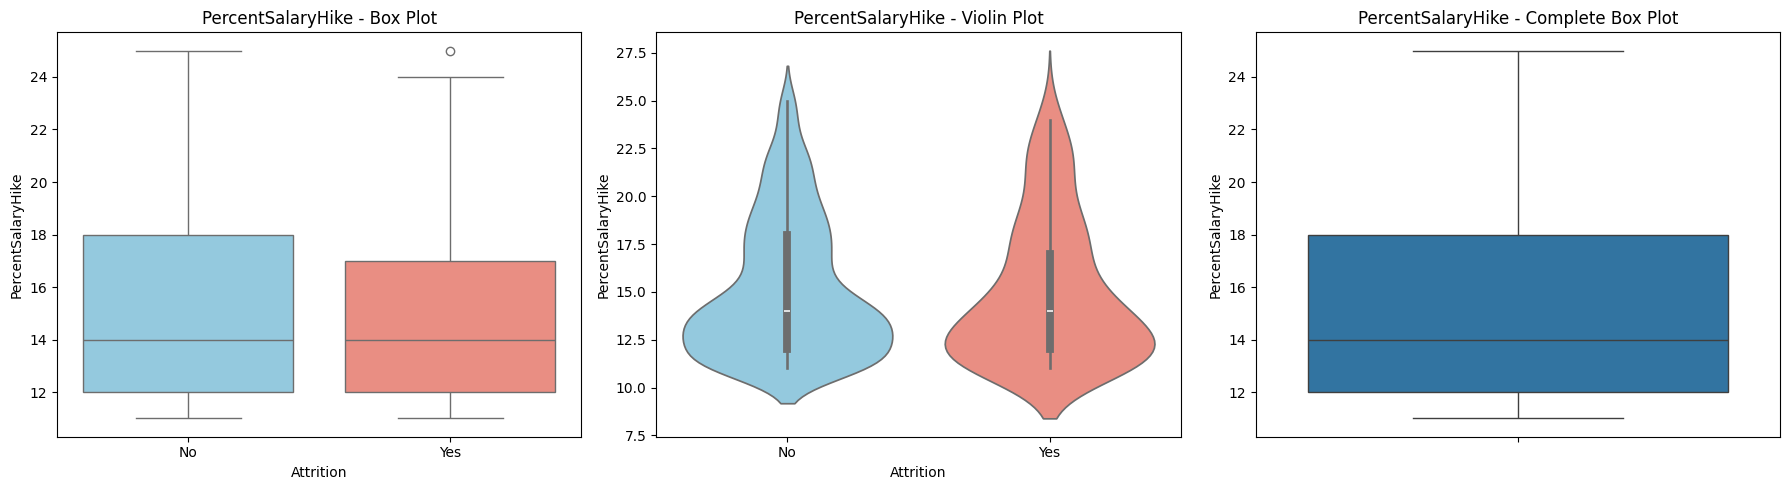


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>StockOptionLevel</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


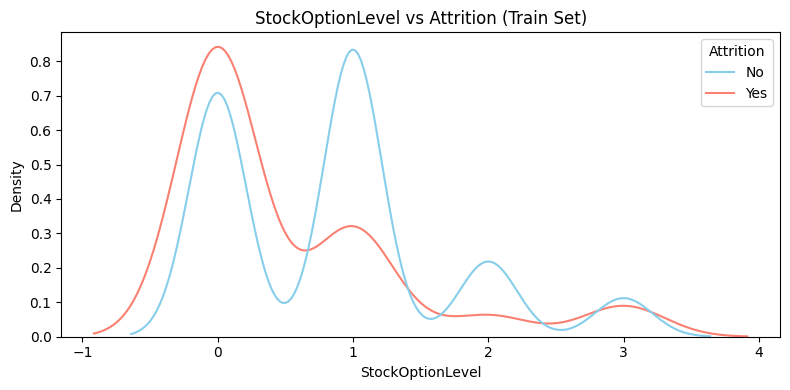

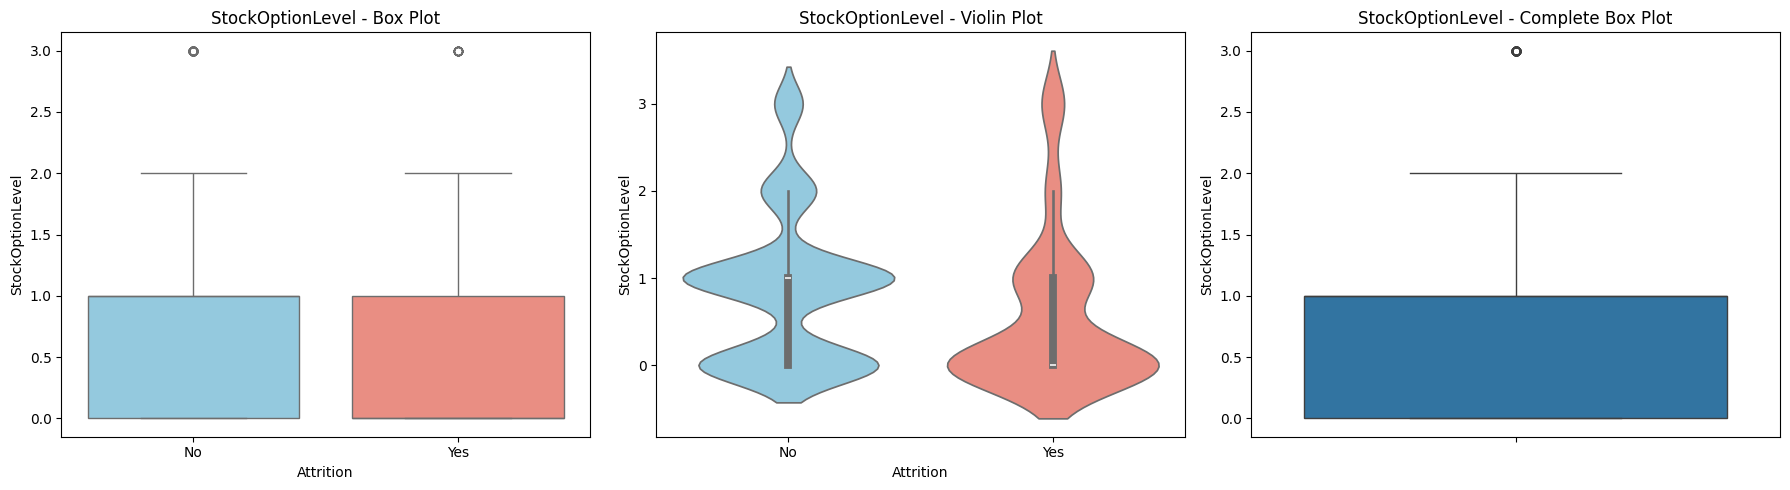


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>TotalWorkingYears</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


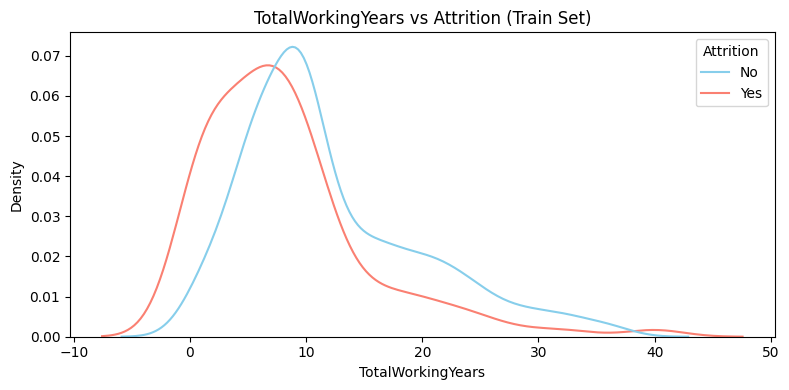

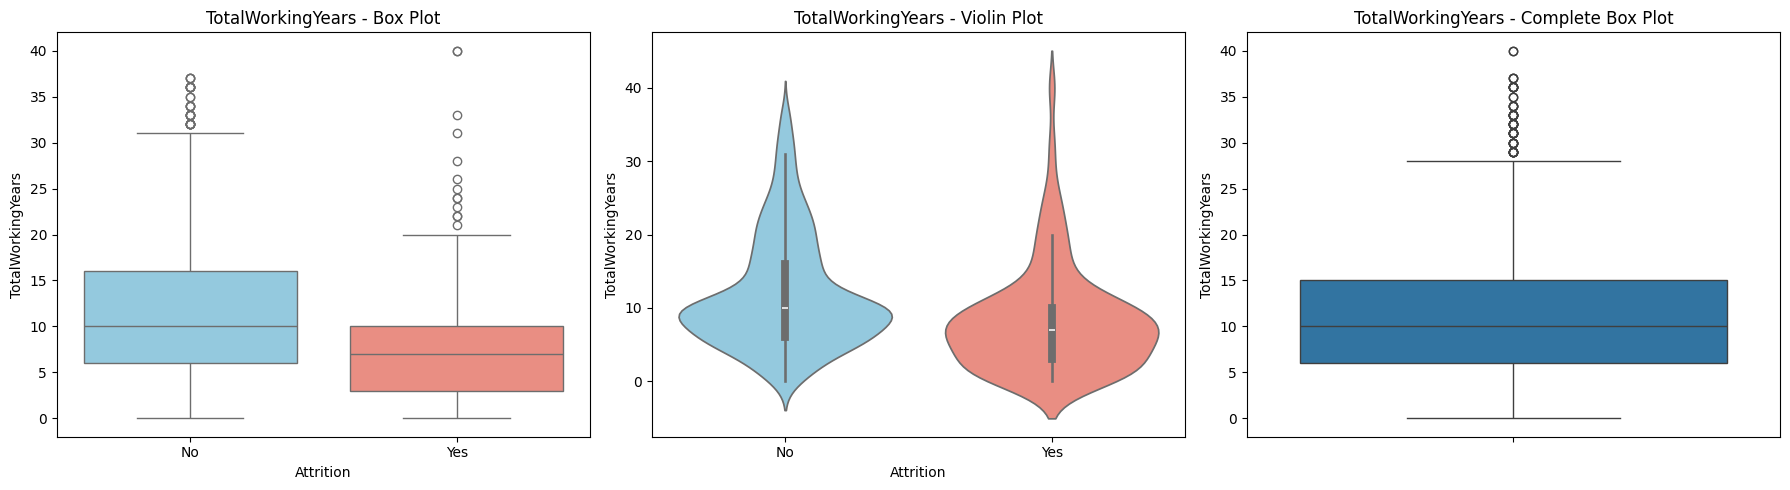


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>TrainingTimesLastYear</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


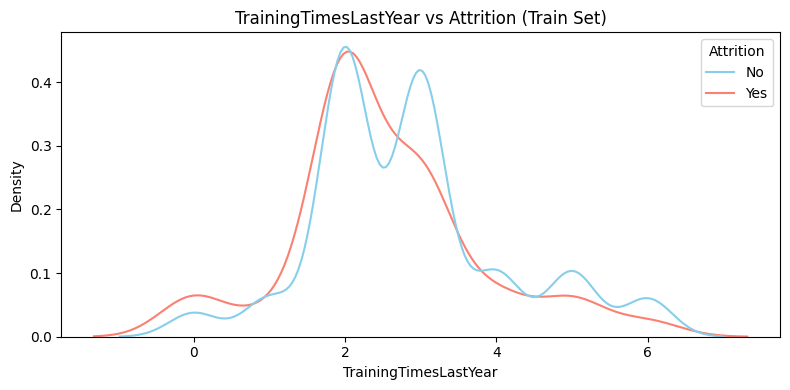

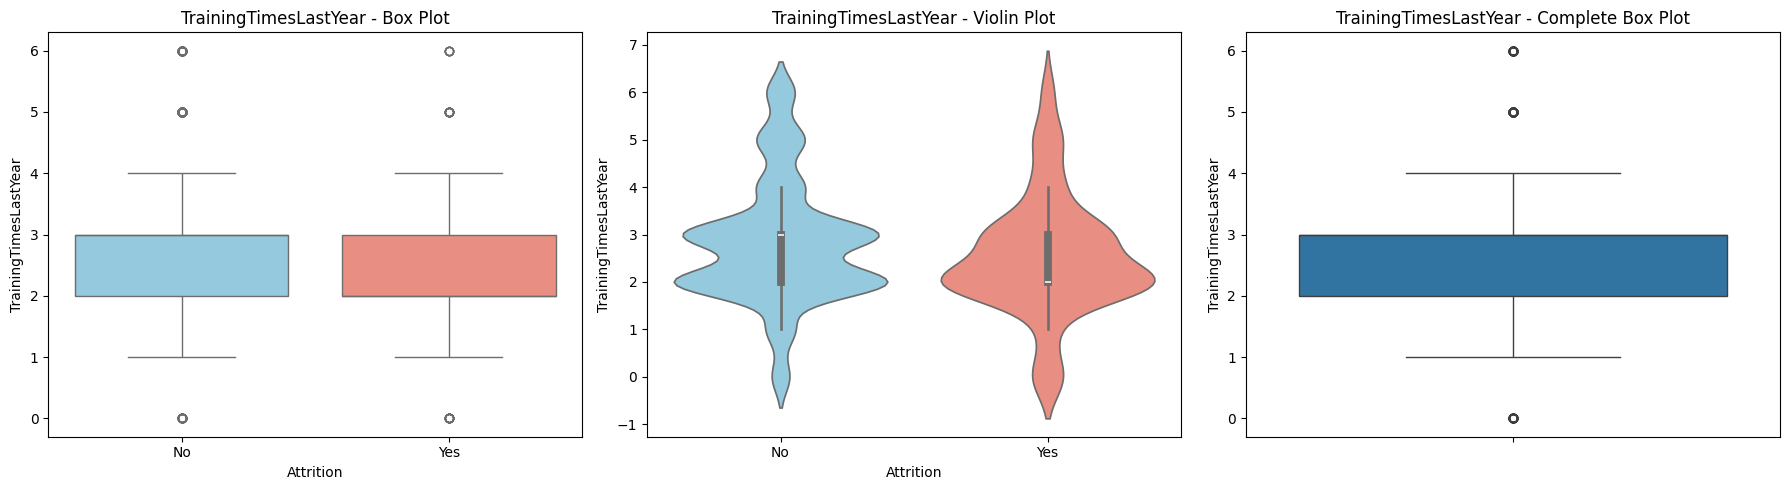


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>YearsAtCompany</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


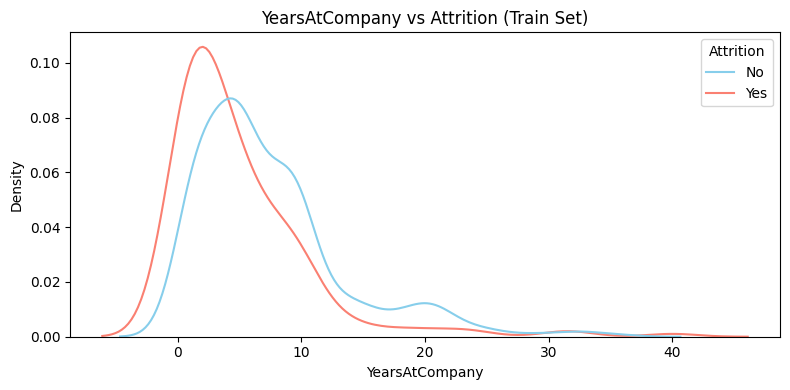

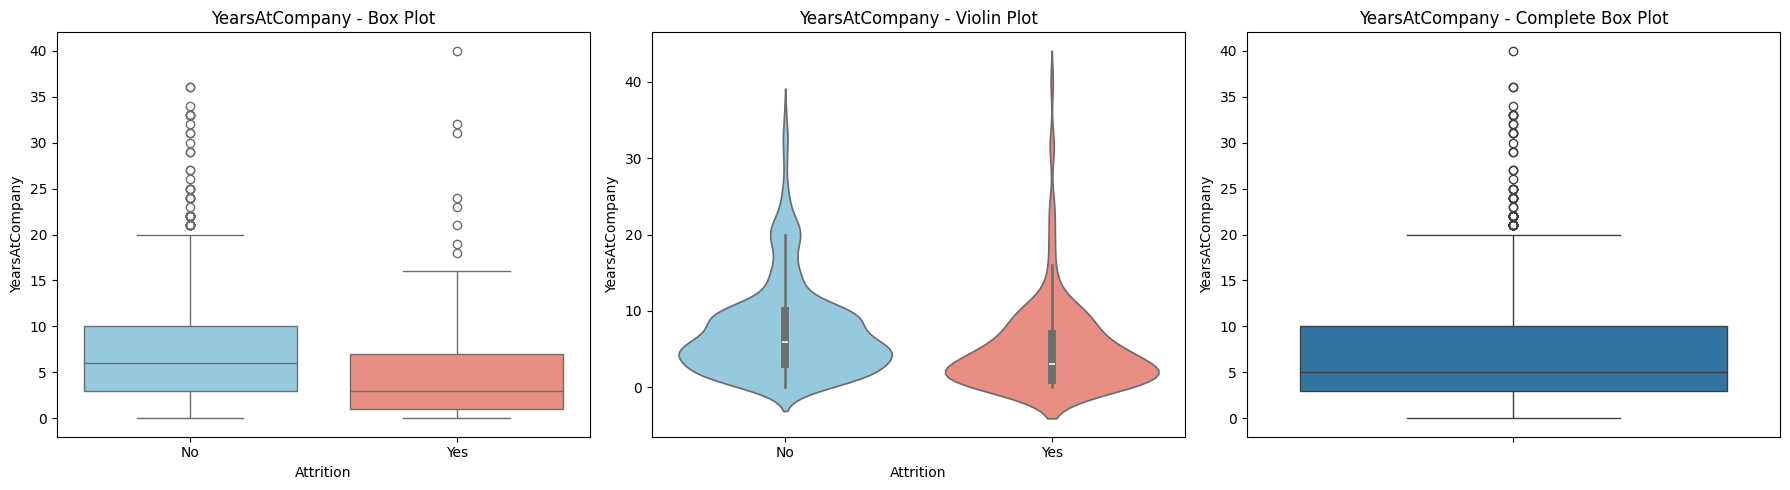


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>YearsInCurrentRole</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


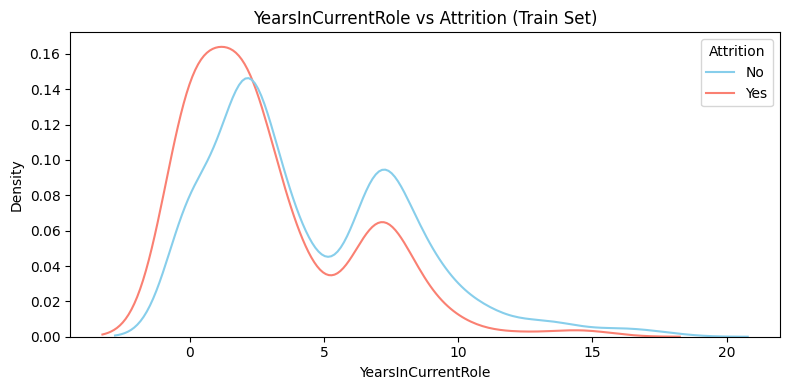

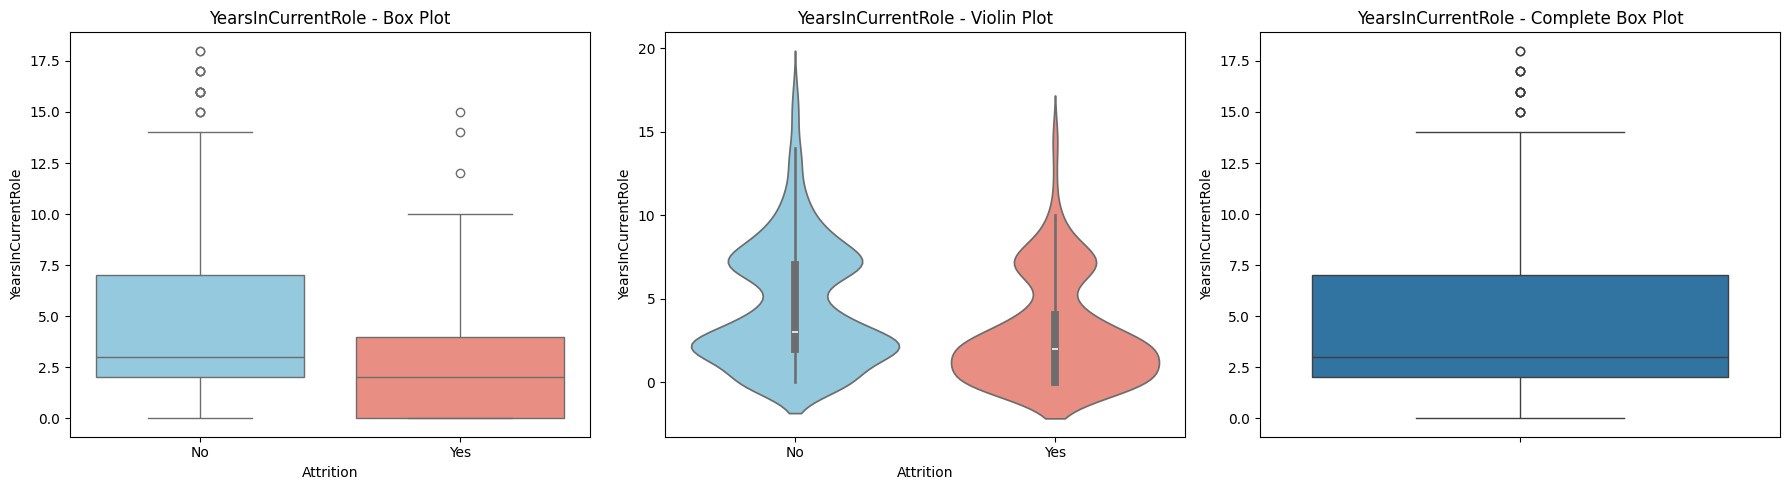


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>YearsSinceLastPromotion</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


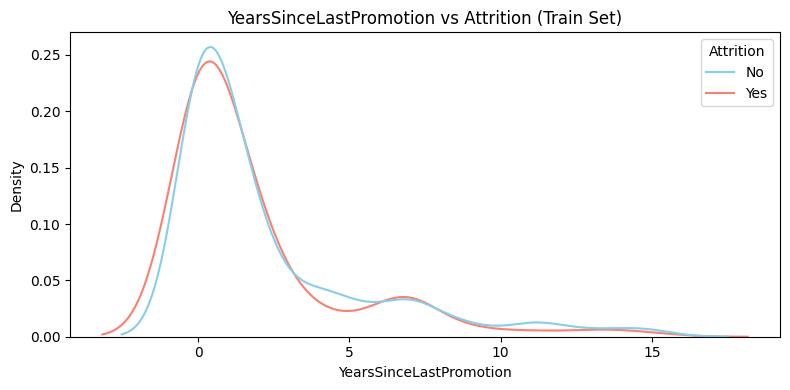

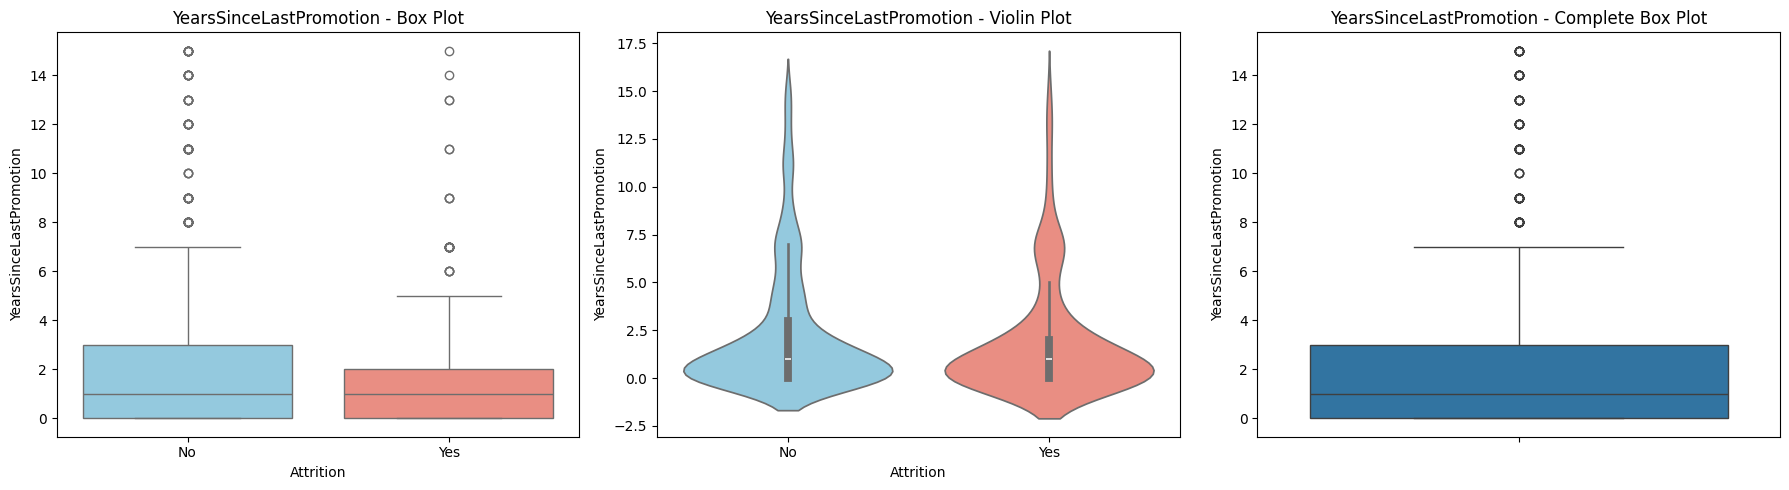


<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>YearsWithCurrManager</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>


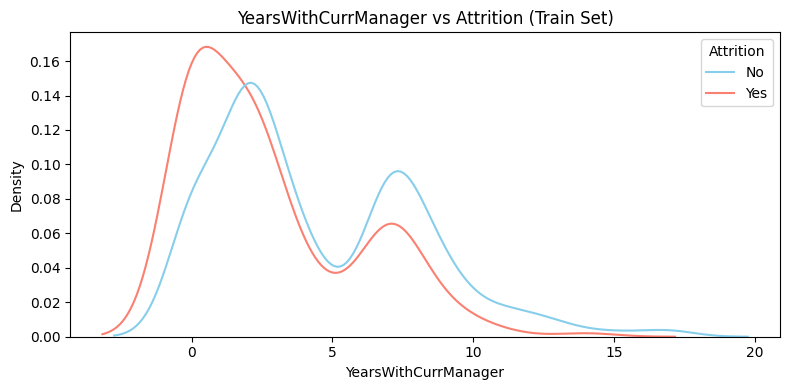

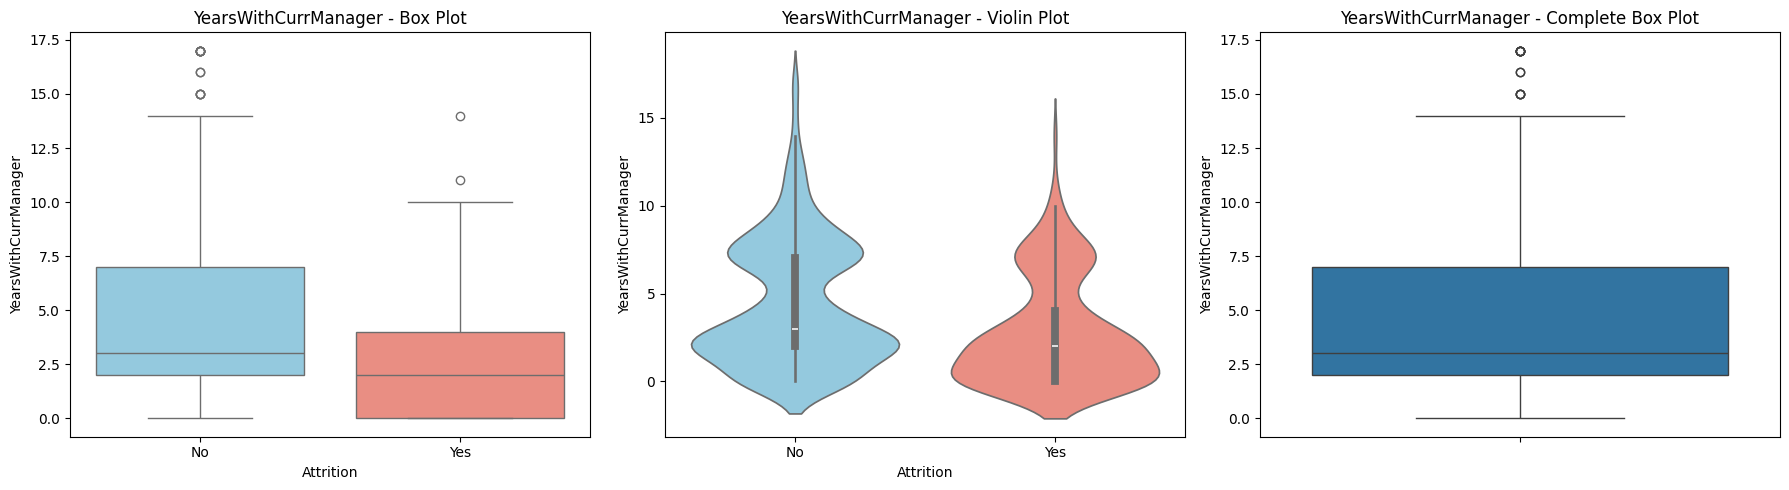

In [16]:


for numerical_column in numerical_columns_train:
    display(Markdown(f"""
<br><br>
<hr style="height:4px; background-color:#666;">
<h2 style="color:#2c3e50;">📊 Analyzing Feature: <code>{numerical_column}</code></h2>
<hr style="height:2px; background-color:#aaa;">
<br><br>
"""))
    overlaid_pdf_plot(X_train_copy,y_train,numerical_column)
    box_violin_plot(X_train_copy,y_train,numerical_column)
    # ecdf_plot(X_train_copy,y_train,numerical_column)
    # swarm_strip_plot(X_train_copy,y_train,numerical_column)
    # attrition_pairplot(X_train_copy,y_train,numerical_column)

### 🔍 Additional Observations on Employee Attrition based on numerical features

---

#### 📌 Outliers
- While there appear to be a few data points that stand out as outliers, they seem to be valid when considered within the real-world context. These values likely represent uncommon but legitimate scenarios, and therefore, should not be treated as statistical anomalies or removed from the dataset.
- Ex:- If you look for monthly income very few people are above 18k, and in real world it is practical that only few people have high salary range.

---

#### 📌 Age & Compensation
- Employees aged between **28–32 years** are more likely to leave the company.
- Employees with **lower daily rates (₹400–₹700)** show a higher tendency to attrite.
- **Monthly income** has a noticeable impact—those earning around ₹3,000 are more likely to leave.
- **Hourly rate** and **monthly rate** do **not** significantly differentiate between employees who stay or leave.

---

#### 📌 Location & Experience
- Employees who **live closer to the office** are less likely to leave.
- Those with **fewer previous companies** tend to have **lower attrition risk**.
- Employees with **lower total working years** are more likely to attrite.
- **Shorter tenure** at the current company increases the likelihood of attrition.
- Fewer **years in the current role** is also associated with higher attrition.

---

#### 📌 Job Level & Growth
- Entry-level employees (**Job Level 1**) have a higher attrition rate.
- **Hike percentage** (last appraisal) has **minimal impact** on attrition.
- **Years since last promotion** doesn't significantly influence attrition.
- Employees with **lower years with the current manager** are more likely to leave.
- A **higher number of training sessions** in the last year correlates with **lower attrition**.

---

#### 📌 Benefits & Incentives
- Employees with **higher stock option levels** tend to stay longer with the company.


### Check outliers in the dataset

### Check correlation and inter colinearity

In [17]:
temp_train = pd.concat([X_train, y_train], axis=1)

business_travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

overtime_map = {
    'No': 0,
    'Yes': 1
}

attrition_map = {
    'No': 0,
    'Yes': 1
}


temp_train["BusinessTravel"] = temp_train["BusinessTravel"].map(business_travel_map)
temp_train["OverTime"] = temp_train["OverTime"].map(overtime_map)
temp_train["Attrition"] = temp_train["Attrition"].map(attrition_map)

temp_train = pd.get_dummies(temp_train, columns=["Department","EducationField","Gender","JobRole","MaritalStatus"], drop_first=False,dtype=float)

cols = temp_train.columns.tolist()
cols.remove("Attrition")
cols.insert(0, "Attrition")

temp_train = temp_train[cols]

temp_train.head()

# temp_train["BusinessTravel"].value_counts()

Attrition  Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
416           0   38               2       1490                 2          2   
1117          0   34               1       1351                 1          4   
952           1   31               2       1060                 1          3   
1451          0   38               1        345                10          2   
468           0   52               1        956                 6          2   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
416                         4          42               3         1   
1117                        2          45               3         2   
952                         4          54               3         1   
1451                        1         100               3         2   
468                         4          78               3         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
416                 4           1702        12106                   1   
1117                4           5484        13008                   9   
952                 2           2302         8319                   1   
1451                4           5343         5982                   1   
468                 1           5577        22087                   3   

      OverTime  PercentSalaryHike  PerformanceRating  \
416          1                 23                  4   
1117         0                 17                  3   
952          1                 11                  3   
1451         0                 11                  3   
468          1                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
416                          3                 1                  1   
1117                         2                 1                  9   
952                          1                 0                  3   
1451                         3                 1                 10   
468                          2                 2                 18   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
416                       3                3               1   
1117                      3                2               2   
952                       2                4               3   
1451                      1                3              10   
468                       3                3              10   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
416                    0                        0                     0   
1117                   2                        2                     1   
952                    2                        2                     2   
1451                   7                        1                     9   
468                    9                        6                     9   

      Department_Human Resources  Department_Research & Development  \
416                          0.0                                1.0   
1117                         0.0                                1.0   
952                          0.0                                0.0   
1451                         0.0                                0.0   
468                          0.0                                1.0   

      Department_Sales  EducationField_Human Resources  \
416                0.0                             0.0   
1117               0.0                             0.0   
952                1.0                             0.0   
1451               1.0                             0.0   
468                0.0                             0.0   

      EducationField_Life Sciences  EducationField_Marketing  \
416                            1.0                       0.0   
1117                           1.0                       0.0   
952                            1.0                       0.0   
1451                       

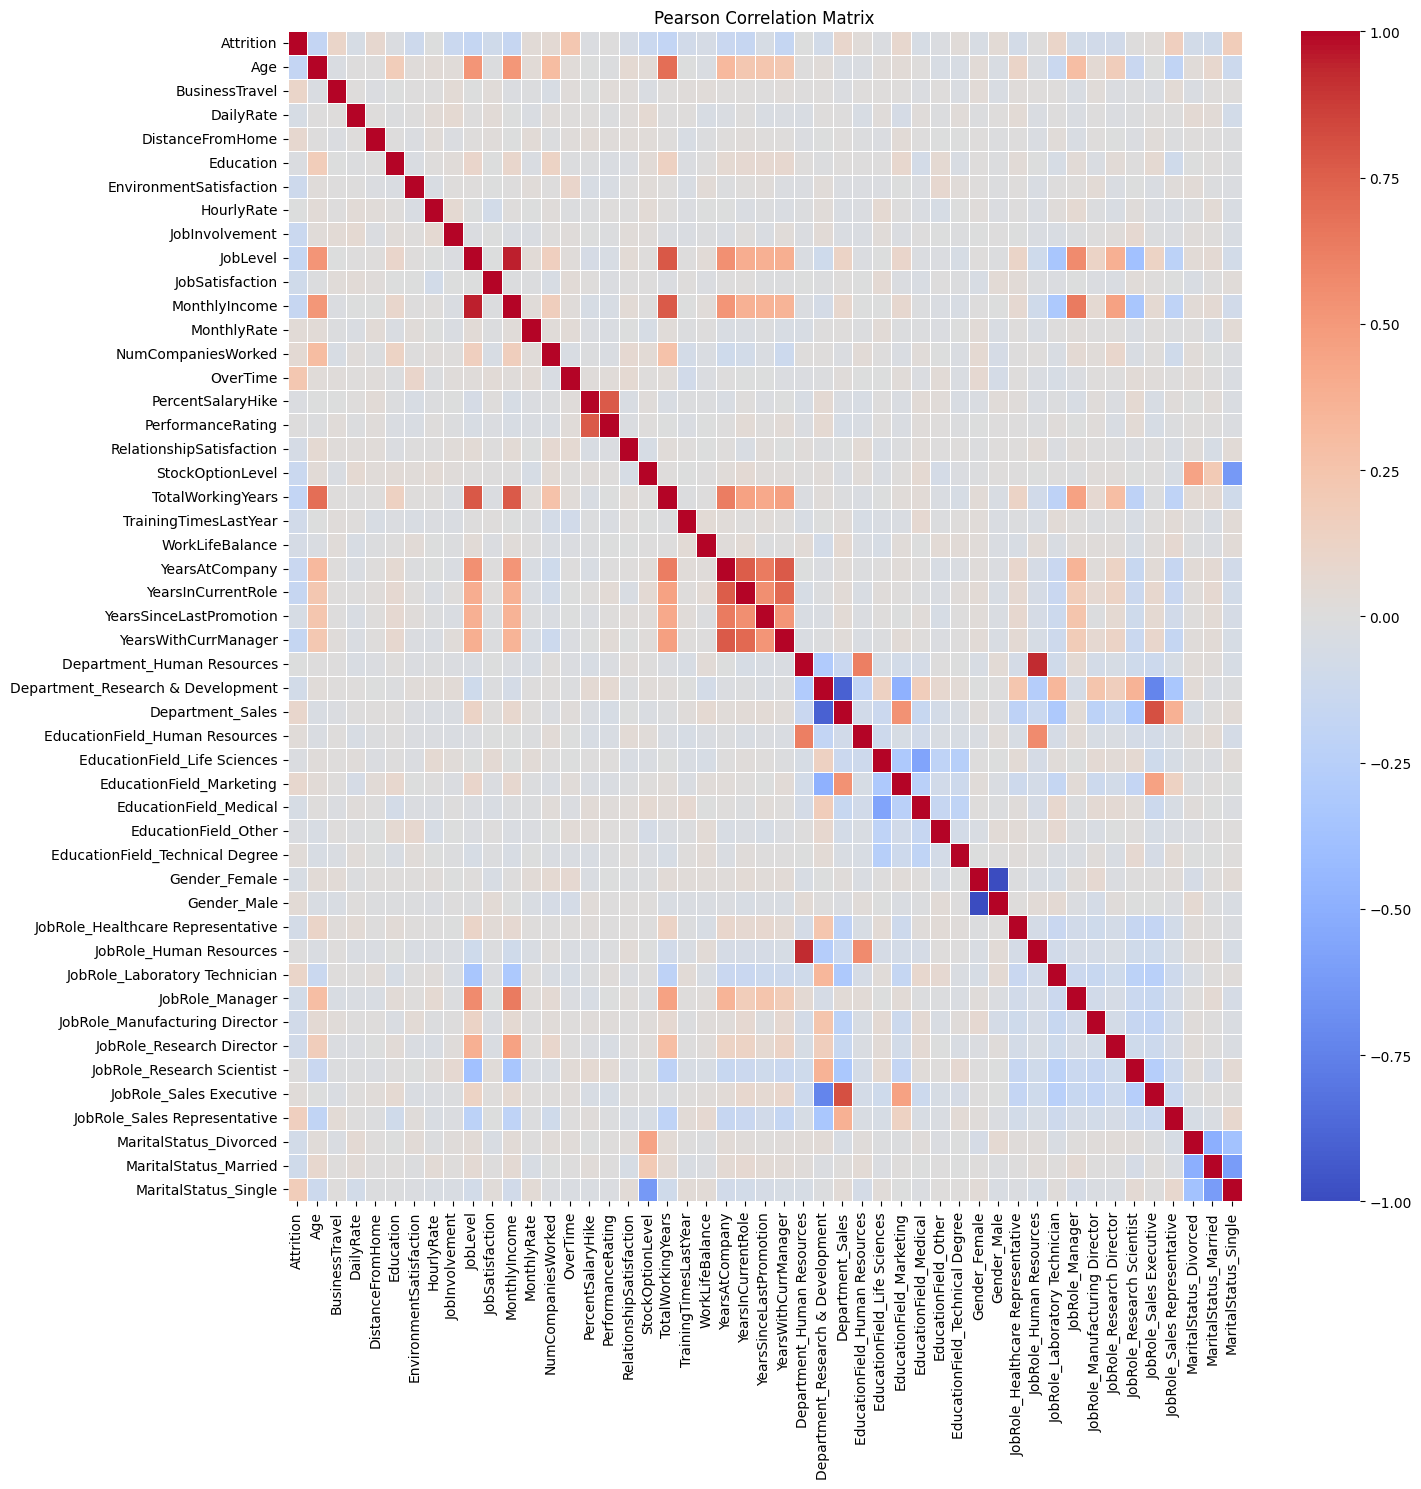

In [18]:
# Calculate the Pearson correlation matrix

correlation_matrix = temp_train.corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

In [19]:
# show top5 and bottom 5

correlation_series = temp_train.corr(method='pearson')["Attrition"].sort_values(key=abs, ascending=False)
correlation_series

Attrition                            1.000000
OverTime                             0.230683
TotalWorkingYears                   -0.181534
MaritalStatus_Single                 0.180866
Age                                 -0.174757
YearsWithCurrManager                -0.170709
JobLevel                            -0.166868
YearsInCurrentRole                  -0.162793
JobRole_Sales Representative         0.158510
MonthlyIncome                       -0.157157
YearsAtCompany                      -0.146502
JobInvolvement                      -0.138503
StockOptionLevel                    -0.135712
EnvironmentSatisfaction             -0.112834
BusinessTravel                       0.106941
JobRole_Laboratory Technician        0.105166
MaritalStatus_Married               -0.096291
JobSatisfaction                     -0.095836
JobRole_Manufacturing Director      -0.092773
Department_Sales                     0.090034
TrainingTimesLastYear               -0.088293
JobRole_Research Director           -0.087308
JobRole_Manager                     -0.084884
Department_Research & Development   -0.084307
MaritalStatus_Divorced              -0.084224
EducationField_Marketing             0.079666
JobRole_Healthcare Representative   -0.077536
DistanceFromHome                     0.073605
RelationshipSatisfaction            -0.060155
WorkLifeBalance                     -0.055164
YearsSinceLastPromotion             -0.049731
NumCompaniesWorked                   0.047820
EducationField_Medical              -0.047482
DailyRate                           -0.047297
Gender_Male                          0.039154
Gender_Female                       -0.039154
MonthlyRate                          0.035606
EducationField_Human Resources       0.028038
JobRole_Sales Executive              0.027744
EducationField_Technical Degree      0.025005
Education                           -0.022903
PercentSalaryHike                   -0.021127
EducationField_Life Sciences        -0.021028
EducationField_Other                -0.016696
JobRole_Human Resources              0.006769
Department_Human Resources          -0.006269
HourlyRate                          -0.003530
JobRole_Research Scientist           0.002852
PerformanceRating                    0.001379
Name: Attrition, dtype: float64

### 📊 Top 5 Features Highly Correlated with Attrition

---

🔹 **1. OverTime**  
📈 **Correlation:** **0.2307**  
Employees working overtime tend to have higher attrition rates.

---

🔹 **2. Total Working Years**  
📉 **Correlation:** **-0.1815**  
Employees with more total working years are less likely to leave the company.

---

🔹 **3. Marital Status: Single**  
📈 **Correlation:** **0.1809**  
Single employees are more likely to leave the company compared to married employees.

---

🔹 **4. Age**  
📉 **Correlation:** **-0.1748**  
Younger employees tend to have higher attrition rates.

---

🔹 **5. Years with Current Manager**  
📉 **Correlation:** **-0.1707**  
Employees with fewer years under their current manager are more likely to attrite.

---


In [20]:
important_features = correlation_series[:20].keys()

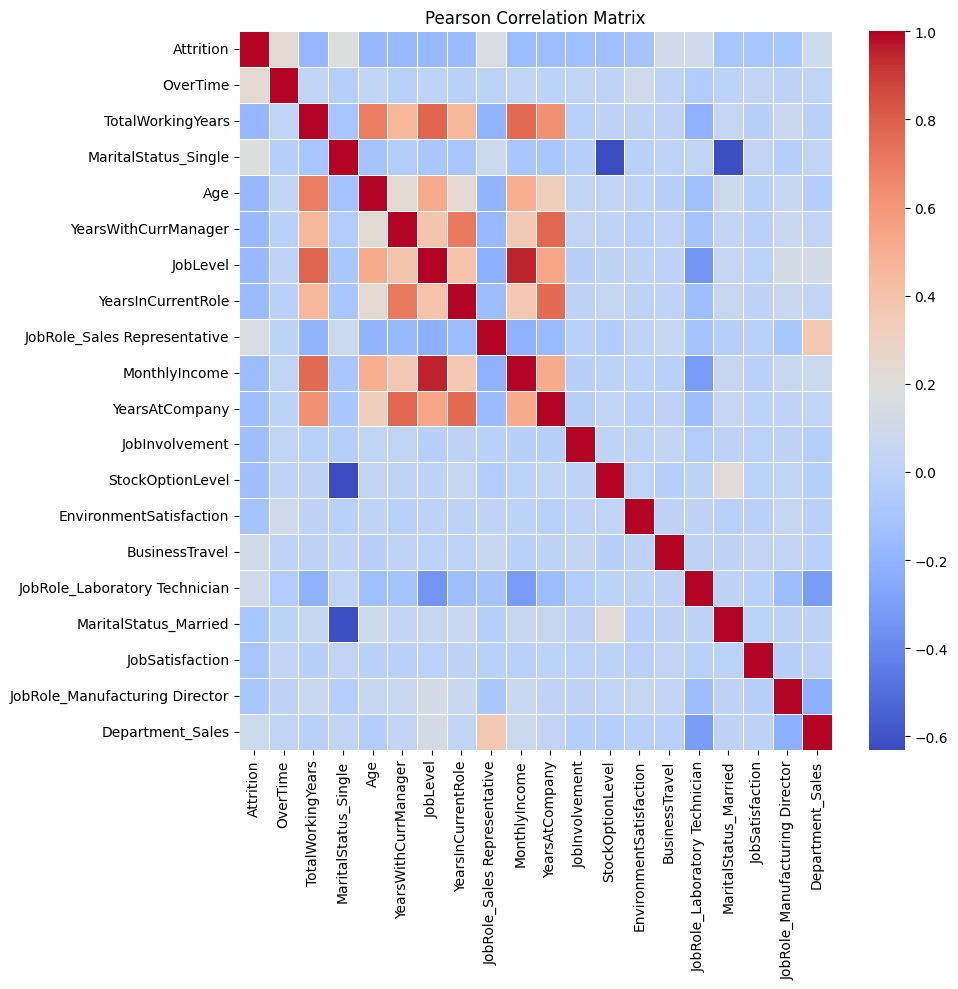

In [21]:
# top 20 features that affect the attrition

important_correlation_matrix = temp_train[important_features].corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(important_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

In [22]:
def find_highly_correlated_features(dataframe, threshold=0.8):
    """
    Identifies pairs of highly correlated features in a DataFrame based on Pearson correlation.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing numerical features.
        threshold (float): The absolute correlation threshold above which features are considered highly correlated (default is 0.8).

    Returns:
        set: A set of tuples, where each tuple contains a pair of highly correlated feature names.
             The order within the tuple is arbitrary (e.g., ('feature_a', 'feature_b') is the same as ('feature_b', 'feature_a')).
    """
    correlation_matrix = dataframe.corr(method='pearson').abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    highly_correlated_pairs = set()

    for column in upper_triangle.columns:
        highly_correlated = upper_triangle[column][upper_triangle[column] > threshold].index
        for feature in highly_correlated:
            # Ensure we only add each pair once (alphabetical order to avoid duplicates)
            pair = tuple(sorted((column, feature)))
            if column != feature:  # Avoid self-correlation
                highly_correlated_pairs.add(pair)

    return highly_correlated_pairs


highly_correlated_pairs = find_highly_correlated_features(temp_train, threshold=0.8)
highly_correlated_pairs


{('Department_Human Resources', 'JobRole_Human Resources'),
 ('Department_Research & Development', 'Department_Sales'),
 ('Department_Sales', 'JobRole_Sales Executive'),
 ('Gender_Female', 'Gender_Male'),
 ('JobLevel', 'MonthlyIncome')}

### 🔍 Observations on Feature Correlation

---

🔹 **High Inter-Correlation Among Features**  
Several features in the dataset show **strong correlations** with each other. This can potentially lead to issues like multicollinearity.

---

🔹 **Gender One-Hot Encoding**  
Since the **gender** variable is **one-hot encoded**, it results in high correlation between the encoded categories (e.g., **Male** and **Female**).  
📌 **Benefit:** This avoids introducing artificial ordinality into gender, keeping it a nominal feature without implying any rank order.

---

🔹 **Highly Inter-Correlated Features to Remove**  
Features like:
- `'Department_Human Resources'`
- `'Department_Sales'`
- `'JobLevel'`

📉 **Reason for Removal:** These features are highly inter-correlated and can be removed to reduce multicollinearity. This helps in simplifying the model while preserving essential information.

---


# Feature engineering

In [23]:
df_original = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_original.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [24]:

X = df_original.drop('Attrition', axis=1)
y = df_original['Attrition']

attrition_map = {
    'No': 0,
    'Yes': 1
}

y = y.map(attrition_map)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## 📓 Derived Features (Feature Engineering)

---

🔹 ** Ratio of Role Stability**  
**Formula:** `YearsInCurrentRole / YearsAtCompany`  
📌 Indicates role stability relative to company tenure.

---

🔹 ** Promotion Rate**  
**Formula:** `YearsSinceLastPromotion / YearsAtCompany`  
📌 Reflects the frequency of promotions over time.

---

🔹 ** Income per Year of Experience**  
**Formula:** `(MonthlyIncome * 12) / TotalWorkingYears`  
📌 Measures earnings efficiency based on total experience.

---

🔹 ** Is Manager**  
**Logic:** `True` if `JobLevel ≥ 4`, else `False`  
📌 Flags employees at managerial level or above.

---

🔹 ** Loyalty Index**  
**Formula:** `YearsWithCurrManager / TotalWorkingYears`  
📌 Represents loyalty to the current manager relative to total experience.

---

🔹 ** Job Hop Rate**  
**Formula:** `NumCompaniesWorked / TotalWorkingYears`  
📌 Identifies frequency of job changes.

---

🔹 ** Is Recently Promoted**  
**Logic:** `True` if `YearsSinceLastPromotion ≤ 2`, else `False`  
📌 Flags employees recently promoted.

---

🔹 ** Is New Joiner**  
**Logic:** `True` if `YearsAtCompany ≤ 2`, else `False`  
📌 Identifies employees new to the company.

---


In [25]:
X_train.head()

Age     BusinessTravel  DailyRate              Department  \
1194   47      Travel_Rarely       1225                   Sales   
128    22      Travel_Rarely        594  Research & Development   
810    46      Travel_Rarely        406                   Sales   
478    25      Travel_Rarely        622                   Sales   
491    43  Travel_Frequently       1001  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1194                 2          4     Life Sciences              1   
128                  2          1  Technical Degree              1   
810                  3          1         Marketing              1   
478                 13          1           Medical              1   
491                  9          5           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1194            1676                        2  Female          47   
128              169                        3    Male         100   
810             1124                        1    Male          52   
478              645                        2    Male          40   
491              663                        4    Male          72   

      JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
1194               4         4                Manager                2   
128                3         1  Laboratory Technician                4   
810                3         4                Manager                3   
478                3         1   Sales Representative                3   
491                3         2  Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1194      Divorced          15972        21086                   6      Y   
128        Married           2523        19299                   0      Y   
810        Married          17465        15596                   3      Y   
478        Married           2096        26376                   1      Y   
491       Divorced           5679        19627                   3      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1194       No                 14                  3                         3   
128        No                 14                  3                         3   
810        No                 12                  3                         4   
478        No                 11                  3                         3   
491       Yes                 13                  3                         2   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1194             80                 3                 29   
128              80                 1                  3   
810              80                 1                 23   
478              80                 0                  7   
491              80                 1                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194                      2                3               3   
128                       2                3               2   
810                       3                3              12   
478                       1                3               7   
491                       3                3               8   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1194                   2                        1                     2  
128                    1                        2                     1  
810                    9                        4                     9  
478                    4                        0                     6  
491                    7                        4                     7

In [26]:
def create_derived_features(df):
    df['Stability'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1e-6)
    df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1e-6)
    df['IncomePerYear'] = df['MonthlyIncome'] * 12 / (df['TotalWorkingYears'] + 1e-6)
    df['IsManager'] = (df['JobLevel'] >= 4).astype(int)
    df['LoyaltyIndex'] = df['YearsWithCurrManager'] / (df['TotalWorkingYears'] + 1e-6)
    df['JobHopRate'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] + 1e-6)
    df['IsRecentlyPromoted'] = (df['YearsSinceLastPromotion'] <= 2) .astype(int)
    df['IsNewJoiner'] = (df['YearsAtCompany'] <= 2).astype(int)
    return df

X_train = create_derived_features(X_train)
X_val = create_derived_features(X_val)
X_test = create_derived_features(X_test)

X_train.head()

Age     BusinessTravel  DailyRate              Department  \
1194   47      Travel_Rarely       1225                   Sales   
128    22      Travel_Rarely        594  Research & Development   
810    46      Travel_Rarely        406                   Sales   
478    25      Travel_Rarely        622                   Sales   
491    43  Travel_Frequently       1001  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1194                 2          4     Life Sciences              1   
128                  2          1  Technical Degree              1   
810                  3          1         Marketing              1   
478                 13          1           Medical              1   
491                  9          5           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1194            1676                        2  Female          47   
128              169                        3    Male         100   
810             1124                        1    Male          52   
478              645                        2    Male          40   
491              663                        4    Male          72   

      JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
1194               4         4                Manager                2   
128                3         1  Laboratory Technician                4   
810                3         4                Manager                3   
478                3         1   Sales Representative                3   
491                3         2  Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1194      Divorced          15972        21086                   6      Y   
128        Married           2523        19299                   0      Y   
810        Married          17465        15596                   3      Y   
478        Married           2096        26376                   1      Y   
491       Divorced           5679        19627                   3      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1194       No                 14                  3                         3   
128        No                 14                  3                         3   
810        No                 12                  3                         4   
478        No                 11                  3                         3   
491       Yes                 13                  3                         2   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1194             80                 3                 29   
128              80                 1                  3   
810              80                 1                 23   
478              80                 0                  7   
491              80                 1                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194                      2                3               3   
128                       2                3               2   
810                       3                3              12   
478                       1                3               7   
491                       3                3               8   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1194                   2                        1                     2   
128                    1                        2                     1   
810                    9                        4                     9   
478                    4                        0                     6   
491                    7                        4                     7   

      Stability  PromotionRate  IncomePerYear  IsManager  LoyaltyIndex  \
1194   0.666666       0.333333    6609.103220          1      0.068966   
128    0.500000       1.000

## 🛠️ Preprocessing Steps

---

🔹 **📉 Drop Highly Inter-Correlated Features**  
Remove features that introduce multicollinearity and do not add unique information:
- `'Department_Human Resources'`  
- `'Department_Sales'`  
- `'JobLevel'`

---

🔹 **🧪 Apply One-Hot Encoding**  
Convert categorical variables into numerical format without introducing ordinality:
- `Department`  
- `EducationalField`  
- `Gender`  
- `JobRole`  
- `MaritalStatus`

✅ One-hot encoding ensures each category is represented independently, helping machine learning models better interpret categorical features.

---


In [27]:
numerical_cols = ["Age","BusinessTravel","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction",
                  "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
                  "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears",
                  "TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]


useless_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']





def preprocessing(df):

    #Drop useless cols
    df = df.drop(useless_cols, axis=1)

    business_travel_map = {
        'Non-Travel': 0,
        'Travel_Rarely': 1,
        'Travel_Frequently': 2
    }

    overtime_map = {
        'No': 0,
        'Yes': 1
    }

    attrition_map = {
        'No': 0,
        'Yes': 1
    }


    df["BusinessTravel"] = df["BusinessTravel"].map(business_travel_map)
    df["OverTime"] = df["OverTime"].map(overtime_map)

    df = pd.get_dummies(df, columns=["Department","EducationField","Gender","JobRole","MaritalStatus"], drop_first=False,dtype=float)

    return df









X_train = preprocessing(X_train)
X_val = preprocessing(X_val)
X_test = preprocessing(X_test)

X_train.head()

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
1194   47               1       1225                 2          4   
128    22               1        594                 2          1   
810    46               1        406                 3          1   
478    25               1        622                13          1   
491    43               2       1001                 9          5   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1194                        2          47               4         4   
128                         3         100               3         1   
810                         1          52               3         4   
478                         2          40               3         1   
491                         4          72               3         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1194                2          15972        21086                   6   
128                 4           2523        19299                   0   
810                 3          17465        15596                   3   
478                 3           2096        26376                   1   
491                 3           5679        19627                   3   

      OverTime  PercentSalaryHike  PerformanceRating  \
1194         0                 14                  3   
128          0                 14                  3   
810          0                 12                  3   
478          0                 11                  3   
491          1                 13                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1194                         3                 3                 29   
128                          3                 1                  3   
810                          4                 1                 23   
478                          3                 0                  7   
491                          2                 1                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194                      2                3               3   
128                       2                3               2   
810                       3                3              12   
478                       1                3               7   
491                       3                3               8   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1194                   2                        1                     2   
128                    1                        2                     1   
810                    9                        4                     9   
478                    4                        0                     6   
491                    7                        4                     7   

      Stability  PromotionRate  IncomePerYear  IsManager  LoyaltyIndex  \
1194   0.666666       0.333333    6609.103220          1      0.068966   
128    0.500000       1.000000   10091.996636          0      0.333333   
810    0.750000       0.333333    9112.173517          1      0.391304   
478    0.571428       0.000000    3593.142344          0      0.857143   
491    0.875000       0.500000    6814.799319          0      0.700000   

      JobHopRate  IsRecentlyPromoted  IsNewJoiner  Department_Human Resources  \
1194    0.206897                   1            0                         0.0   
128     0.000000                   1            1                         0.0   
810     0.130435                   0            0                         0.0   
478     0.142857                   1            0                         0.0   
491     0.300000                   0            0                         0.0   

      Department_Research & Development  Department_Sales  \
1194                                0.0               1.0   
128                                 1.0               0.0   
810       

In [28]:
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [29]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])


def scale_data(df):

    df_scaled = df.copy()
    df_scaled[numerical_cols] = scaler.transform(df_scaled[numerical_cols])

    return df_scaled


X_train = scale_data(X_train)
X_val = scale_data(X_val)
X_test = scale_data(X_test)

X_train.head()

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
1194  1.090194       -0.161510   1.049455         -0.899915   1.064209   
128  -1.634828       -0.161510  -0.523449         -0.899915  -1.855332   
810   0.981193       -0.161510  -0.992080         -0.777610  -1.855332   
478  -1.307825       -0.161510  -0.453653          0.445433  -1.855332   
491   0.654191        1.700602   0.491086         -0.043784   2.037390   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1194                -0.658710   -0.908436        1.795282  1.762189   
128                  0.260202    1.694111        0.373564 -0.986265   
810                 -1.577622   -0.662913        0.373564  1.762189   
478                 -0.658710   -1.252169        0.373564 -0.986265   
491                  1.179114    0.319180        0.373564 -0.070114   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1194        -0.647997       2.026752     0.931289            1.330763   
128          1.153526      -0.864408     0.682742           -1.083704   
810          0.252765       2.347706     0.167705            0.123529   
478          0.252765      -0.956202     1.667056           -0.681293   
491          0.252765      -0.185956     0.728362            0.123529   

      OverTime  PercentSalaryHike  PerformanceRating  \
1194         0          -0.337129          -0.432065   
128          0          -0.337129          -0.432065   
810          0          -0.880974          -0.432065   
478          0          -1.152896          -0.432065   
491          1          -0.609051          -0.432065   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1194                  0.240218          2.613100           2.261482   
128                   0.240218          0.247430          -1.072675   
810                   1.160403          0.247430           1.492061   
478                   0.240218         -0.935405          -0.559727   
491                  -0.679966          0.247430          -0.175017   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194              -0.605389         0.337621       -0.665706   
128               -0.605389         0.337621       -0.830071   
810                0.190962         0.337621        0.813578   
478               -1.401740         0.337621       -0.008246   
491                0.190962         0.337621        0.156119   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1194           -0.625365                -0.368024             -0.616406   
128            -0.905635                -0.056884             -0.897047   
810             1.336527                 0.565398              1.348076   
478            -0.064824                -0.679165              0.506155   
491             0.775986                 0.565398              0.786795   

      Stability  PromotionRate  IncomePerYear  IsManager  LoyaltyIndex  \
1194   0.666666       0.333333    6609.103220          1      0.068966   
128    0.500000       1.000000   10091.996636          0      0.333333   
810    0.750000       0.333333    9112.173517          1      0.391304   
478    0.571428       0.000000    3593.142344          0      0.857143   
491    0.875000       0.500000    6814.799319          0      0.700000   

      JobHopRate  IsRecentlyPromoted  IsNewJoiner  Department_Human Resources  \
1194    0.206897                   1            0                         0.0   
128     0.000000                   1            1                         0.0   
810     0.130435                   0            0                         0.0   
478     0.142857                   1            0                         0.0   
491     0.300000                   0            0                         0.0   

      Department_Research & Development  Department_Sales  \
1194                                0.0               1.0   
128                                 1.0       

# Modelling

### ⚖️ Handling Imbalanced Dataset

The dataset exhibits class imbalance, which can negatively impact model performance. There are two main strategies to address this:

---

🔹 ** Oversample the Minority Class**  
Use techniques like **SMOTE** or **Random Oversampling** to generate more samples for the minority class (e.g., "Yes" for attrition).  
📌 Helps the model learn from underrepresented examples.

---

🔹 ** Apply Class Balancing in the Model**  
Leverage model-specific parameters like `class_weight='balanced'` (available in models such as Logistic Regression, Random Forest, etc.)  
📌 Adjusts the loss function to penalize misclassifications of the minority class more heavily.

---

✅ Choose the approach based on the algorithm and the impact on performance metrics such as precision, recall, and F1-score.


In [30]:
from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

scale_pos_weight

5.189473684210526

In [31]:


param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000,class_weight='balanced'),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42,class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=scale_pos_weight),
        'params': {
            'n_estimators': [10 , 50 , 100 , 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.5, 0.8, 1],
            'colsample_bytree': [0.5, 0.8, 1]
        }
    },

    # 'SVM': {
    #     'model': SVC(class_weight='balanced', probability=True),
    #     'params': {
    #         'C': [0.1, 1, 10],
    #         'kernel': ['linear', 'rbf'],
    #         'gamma': ['scale', 'auto']
    #     }
    # },

    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },

    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },

    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced',verbose=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.6, 0.8, 1.0]
        }
    },


    'CatBoost': {
        'model': CatBoostClassifier(verbose=0, class_weights=[1, scale_pos_weight]),
        'params': {
            'iterations': [100, 200],
            'depth': [4, 6, 10],
            'learning_rate': [0.01, 0.1],
        }
    },


    'MLP': {
        'model': MLPClassifier(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001],
            'solver': ['adam']
        }
    },

}

results = []

for name, mp in param_grids.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"✅ Best parameters for {name}: {grid.best_params_}")

    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, "predict_proba") else y_pred

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)

    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

# === Display results ===
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df)



🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

🔍 Tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

🔍 Tuning XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best parameters for XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

🔍 Tuning KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

🔍 Tuning Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
✅ Best parameters for Naive Bayes: {}

🔍 Tuning LightGBM...
Fitting 5 folds for each of 36 candidates, totalling

## Train use ensembel model on complete train dataset and test it

In [32]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight, colsample_bytree= 0.5, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5)
cat_model = CatBoostClassifier(verbose=0, class_weights=[1, scale_pos_weight] , depth=4 , iterations=100 , learning_rate=0.1)

xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)


model = VotingClassifier(estimators=[
         ('cat', cat_model), ('xgb', xgb_model)],
         voting='soft')

model.fit(X_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7d74cf5eb7d0>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [33]:
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_model(model, X, y, dataset="Test"):
    # Make predictions
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calculate metrics
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_proba)

    # Create styled DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1 Score', 'AUC ROC'],
        'Score': [precision, recall, f1, auc],
        'Dataset': [dataset]*4
    })

    # Apply styling to metrics table with larger text
    styled_df = metrics_df.style \
        .hide(axis='index') \
        .format({'Score': '{:.4f}'}) \
        .bar(subset=['Score'], align='mid', color=['#ff6b6b', '#5fba7d']) \
        .set_properties(**{
            'background-color': '#f8f9fa',
            'color': '#212529',
            'border-color': '#dee2e6',
            'text-align': 'center',
            'font-size': '16pt'  # Increased font size
        }) \
        .set_table_styles([{
            'selector': 'th',
            'props': [
                ('background-color', '#343a40'),
                ('color', 'white'),
                ('font-size', '18pt')  # Larger header text
            ]
        }]) \
        .set_caption(f'<h3 style="text-align:center;color:#2c3e50;font-weight:bold;font-size:20px">{dataset} Set Performance Metrics</h3>')

    # Create figure with two subplots
    fig = plt.figure(figsize=(16, 7))  # Slightly larger figure
    fig.suptitle(f'{dataset} Set Evaluation', fontsize=20, y=1.05)  # Larger title

    # First subplot - metrics table
    ax1 = fig.add_subplot(121)
    ax1.axis('off')
    table = ax1.table(
        cellText=metrics_df.values,
        colLabels=metrics_df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#343a40']*3,
        cellColours=[['#f8f9fa']*3]*len(metrics_df)
    )
    table.auto_set_font_size(False)
    table.set_fontsize(16)  # Larger table text
    table.scale(1.2, 1.5)  # More row height

    # Second subplot - confusion matrix
    ax2 = fig.add_subplot(122)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        annot_kws={'size': 18},  # Larger confusion matrix text
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive'],
        ax=ax2
    )
    ax2.set_title('Confusion Matrix', fontsize=18, pad=20)  # Larger title
    ax2.set_xticklabels(
        ax2.get_xticklabels(),
        rotation=45,
        ha='right',
        fontsize=14  # Larger x-axis labels
    )
    ax2.set_yticklabels(
        ax2.get_yticklabels(),
        rotation=0,
        fontsize=14  # Larger y-axis labels
    )

    plt.tight_layout()
    plt.show()

    # Return metrics as dict
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'confusion_matrix': cm
    }

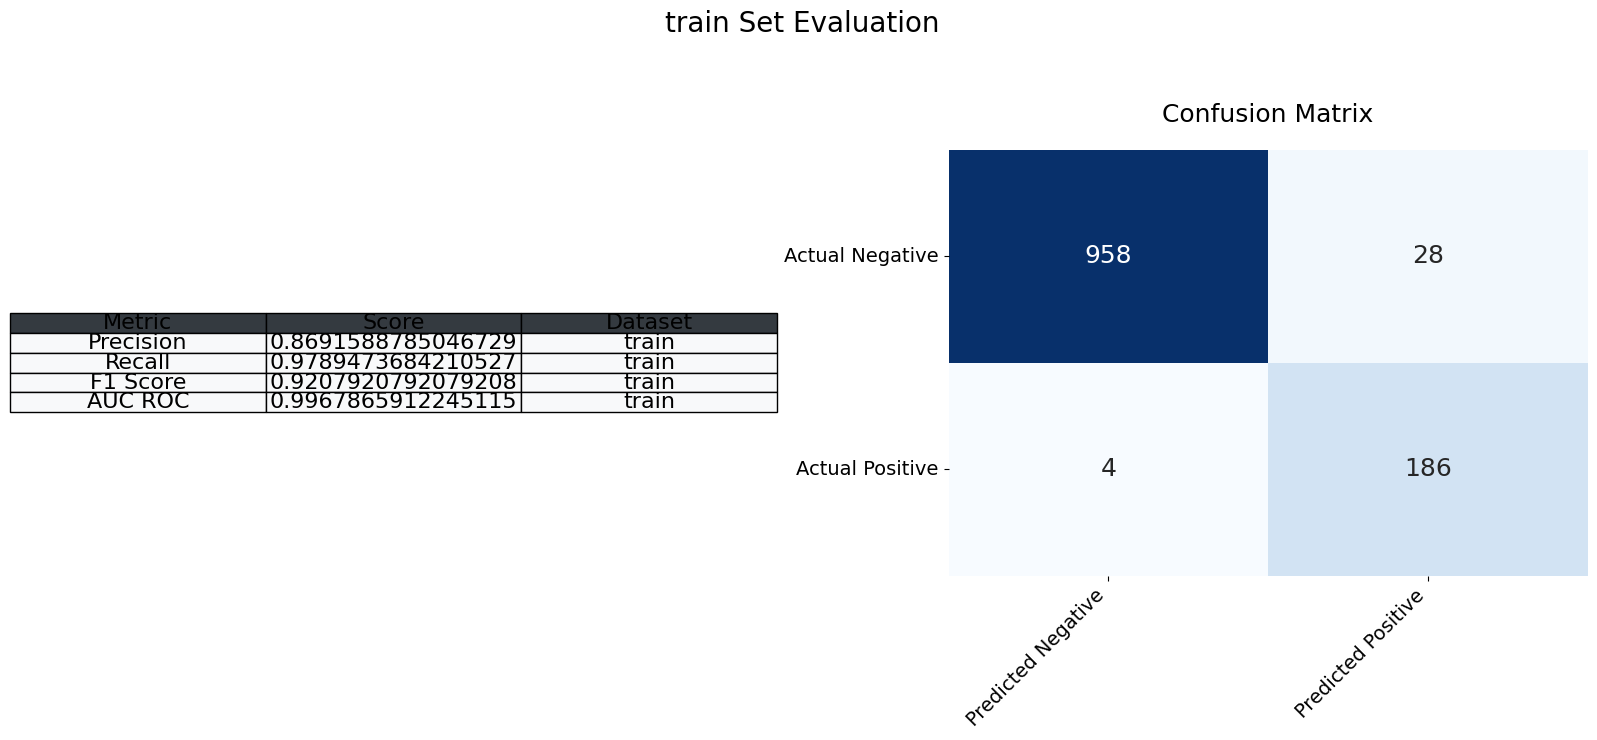

{'precision': 0.8691588785046729,
 'recall': 0.9789473684210527,
 'f1': 0.9207920792079208,
 'auc': np.float64(0.9967865912245115),
 'confusion_matrix': array([[958,  28],
        [  4, 186]])}

In [34]:
evaluate_model(model, X_train, y_train , dataset="train")

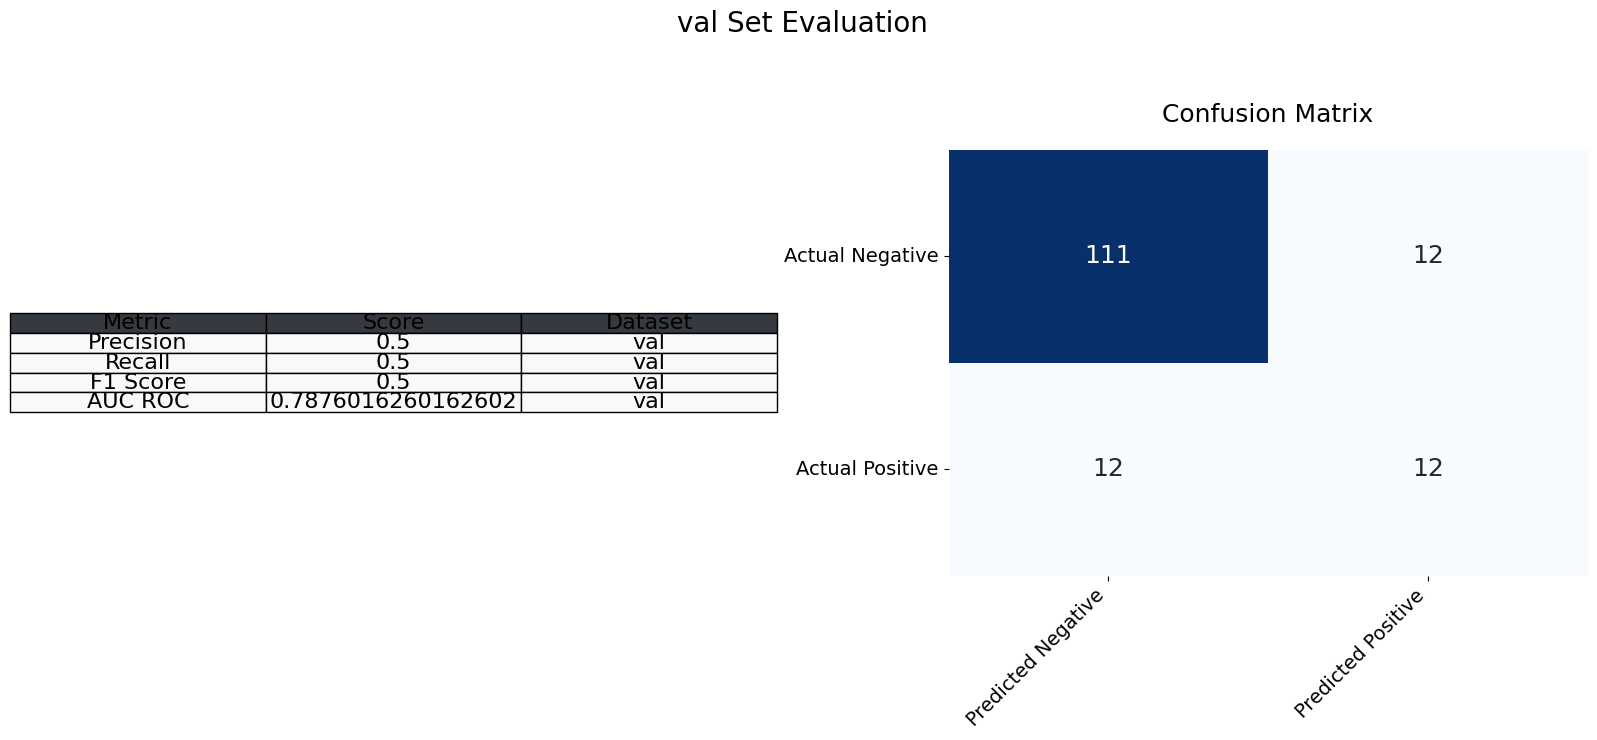

{'precision': 0.5,
 'recall': 0.5,
 'f1': 0.5,
 'auc': np.float64(0.7876016260162602),
 'confusion_matrix': array([[111,  12],
        [ 12,  12]])}

In [35]:
evaluate_model(model, X_val, y_val , dataset="val")

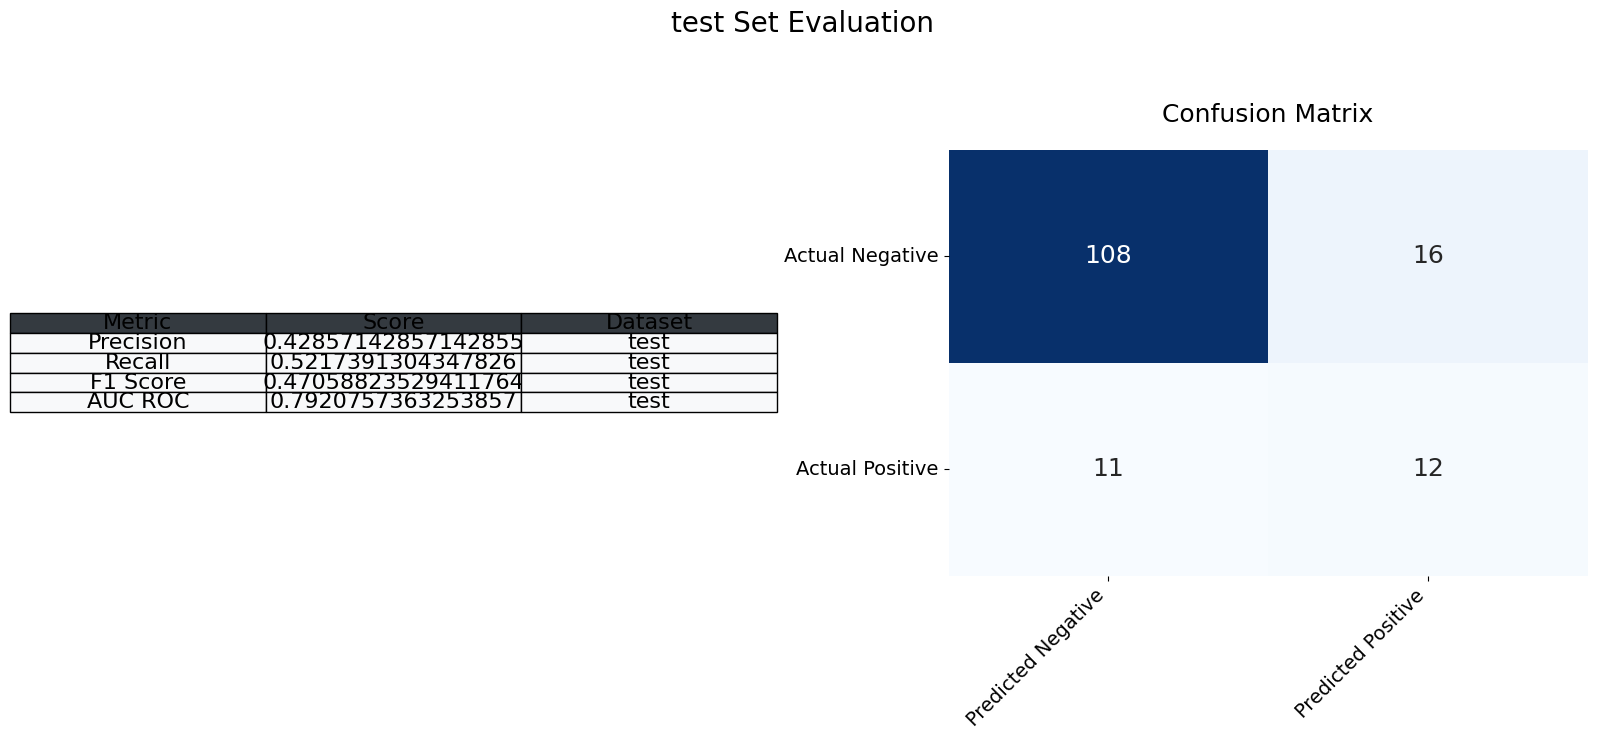

{'precision': 0.42857142857142855,
 'recall': 0.5217391304347826,
 'f1': 0.47058823529411764,
 'auc': np.float64(0.7920757363253857),
 'confusion_matrix': array([[108,  16],
        [ 11,  12]])}

In [36]:
evaluate_model(model, X_test, y_test , dataset="test")

# Save model and test it

In [37]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']

In [38]:
scaler_loaded = joblib.load('scaler.pkl')
model_loaded  = joblib.load('model.pkl')

In [39]:
def create_derived_features(df):
    df['Stability'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1e-6)
    df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1e-6)
    df['IncomePerYear'] = df['MonthlyIncome'] * 12 / (df['TotalWorkingYears'] + 1e-6)
    df['IsManager'] = (df['JobLevel'] >= 4).astype(int)
    df['LoyaltyIndex'] = df['YearsWithCurrManager'] / (df['TotalWorkingYears'] + 1e-6)
    df['JobHopRate'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] + 1e-6)
    df['IsRecentlyPromoted'] = (df['YearsSinceLastPromotion'] <= 2) .astype(int)
    df['IsNewJoiner'] = (df['YearsAtCompany'] <= 2).astype(int)
    return df


numerical_cols = ["Age","BusinessTravel","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction",
                  "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
                  "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears",
                  "TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]


useless_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']





def preprocessing(df,original_df):

    #Drop useless cols
    # df = df.drop(useless_cols, axis=1)

    business_travel_map = {
        'Non-Travel': 0,
        'Travel_Rarely': 1,
        'Travel_Frequently': 2
    }

    overtime_map = {
        'No': 0,
        'Yes': 1
    }

    attrition_map = {
        'No': 0,
        'Yes': 1
    }


    df["BusinessTravel"] = df["BusinessTravel"].map(business_travel_map)
    df["OverTime"] = df["OverTime"].map(overtime_map)
    df = pd.get_dummies(df, columns=["Department","EducationField","Gender","JobRole","MaritalStatus"], drop_first=False,dtype=float)
    return df


def scale_data(df):
    df_scaled = df.copy()
    df_scaled[numerical_cols] = scaler_loaded.transform(df_scaled[numerical_cols])
    return df_scaled



In [40]:
# Define widgets for user input
age = widgets.IntSlider(description='Age', min=18, max=60, value=30)
business_travel = widgets.Dropdown(options=['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], description='Travel')
daily_rate = widgets.IntText(description='DailyRate',min=100,max=1500 ,value=1000)
department = widgets.Dropdown(options=['Sales', 'Research & Development', 'Human Resources'], description='Department')

distance = widgets.IntSlider(description='Distance', min=1, max=30, value=5)
education = widgets.IntSlider(description='Education', min=1, max=5, value=3)
education_field = widgets.Dropdown(options=['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources'], description='Edu Field')
env_satisfaction = widgets.IntSlider(description='EnvSat', min=1, max=4, value=3)


gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender')
hourly_rate = widgets.IntText(description='HourlyRate', min=30 , max=100, value=60)
job_involvement = widgets.IntSlider(description='JobInv', min=1, max=4, value=3)
job_level = widgets.IntSlider(description='JobLvl', min=1, max=5, value=2)




job_role = widgets.Dropdown(options=['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'], description='Job Role')
job_satisfaction = widgets.IntSlider(description='JobSat', min=1, max=4, value=3)
marital_status = widgets.Dropdown(options=['Single', 'Married', 'Divorced'], description='Marital')
monthly_income = widgets.IntText(description='MonthInc',min=1000,max=20000, value=5000)
monthly_rate = widgets.IntText(description='MonthRate', min=2000,max=27000 ,value=20000)
num_companies = widgets.IntSlider(description='NumComp', min=0, max=10, value=1)


overtime = widgets.Dropdown(options=['Yes', 'No'], description='Overtime')
percent_hike = widgets.IntSlider(description='Hike%', min=10, max=25, value=15)
performance_rating = widgets.IntSlider(description='Perf', min=1, max=4, value=3)
rel_satisfaction = widgets.IntSlider(description='RelSat', min=1, max=4, value=3)
stock_option = widgets.IntSlider(description='StockOpt', min=0, max=3, value=1)
total_work_years = widgets.IntSlider(description='TotWorkYrs', min=0, max=40, value=8)
training_times = widgets.IntSlider(description='TrainYrs', min=0, max=6, value=3)
work_life_balance = widgets.IntSlider(description='WLB', min=1, max=4, value=3)
years_at_company = widgets.IntSlider(description='YrsCompany', min=0, max=40, value=5)
years_in_role = widgets.IntSlider(description='YrsInRole', min=0, max=20, value=3)
years_since_promo = widgets.IntSlider(description='YrsSincePromo', min=0, max=20, value=1)
years_with_mgr = widgets.IntSlider(description='YrsWithMgr', min=0, max=20, value=2)

# Button to trigger prediction
predict_button = widgets.Button(description='Predict')

output = widgets.Output()





def on_predict_clicked(b):
    with output:
        output.clear_output()

        # Collect input into a DataFrame
        input_dict = {
            'Age': [age.value],
            'BusinessTravel': [business_travel.value],
            'DailyRate': [daily_rate.value],
            'Department': [department.value],
            'DistanceFromHome': [distance.value],
            'Education': [education.value],
            'EducationField': [education_field.value],
            'EnvironmentSatisfaction': [env_satisfaction.value],
            'Gender': [gender.value],
            'HourlyRate': [hourly_rate.value],
            'JobInvolvement': [job_involvement.value],
            'JobLevel': [job_level.value],
            'JobRole': [job_role.value],
            'JobSatisfaction': [job_satisfaction.value],
            'MaritalStatus': [marital_status.value],
            'MonthlyIncome': [monthly_income.value],
            'MonthlyRate': [monthly_rate.value],
            'NumCompaniesWorked': [num_companies.value],
            'OverTime': [overtime.value],
            'PercentSalaryHike': [percent_hike.value],
            'PerformanceRating': [performance_rating.value],
            'RelationshipSatisfaction': [rel_satisfaction.value],
            'StockOptionLevel': [stock_option.value],
            'TotalWorkingYears': [total_work_years.value],
            'TrainingTimesLastYear': [training_times.value],
            'WorkLifeBalance': [work_life_balance.value],
            'YearsAtCompany': [years_at_company.value],
            'YearsInCurrentRole': [years_in_role.value],
            'YearsSinceLastPromotion': [years_since_promo.value],
            'YearsWithCurrManager': [years_with_mgr.value],
        }

        input_df = pd.DataFrame(input_dict)
        input_df = create_derived_features(input_df)

        input_df = preprocessing(input_df,df_original)


        model_columns = joblib.load("model_columns.pkl")

        for col in model_columns:
            if col not in input_df.columns:
                input_df[col] = 0

        input_df = input_df[model_columns]


        # print(input_df)

        input_df = scale_data(input_df)



        # Handle encoding if needed (depends on your model pipeline)
        prediction = model_loaded.predict(input_df)[0]

        prediction = "Yes" if prediction == 1 else "No"
        print(f"Prediction if employee will leave : {prediction}")
        # Show probability also


predict_button.on_click(on_predict_clicked)


# Display all input widgets in a clean layout
form_items = [
    age, business_travel, daily_rate, department, distance,
    education, education_field, env_satisfaction, gender,
    hourly_rate, job_involvement, job_level, job_role,
    job_satisfaction, marital_status, monthly_income, monthly_rate,
    num_companies, overtime, percent_hike, performance_rating,
    rel_satisfaction, stock_option, total_work_years,
    training_times, work_life_balance, years_at_company,
    years_in_role, years_since_promo, years_with_mgr
]

display(widgets.VBox(form_items + [predict_button, output]))


# Feature importance

## Feature importance of all the used models

cat


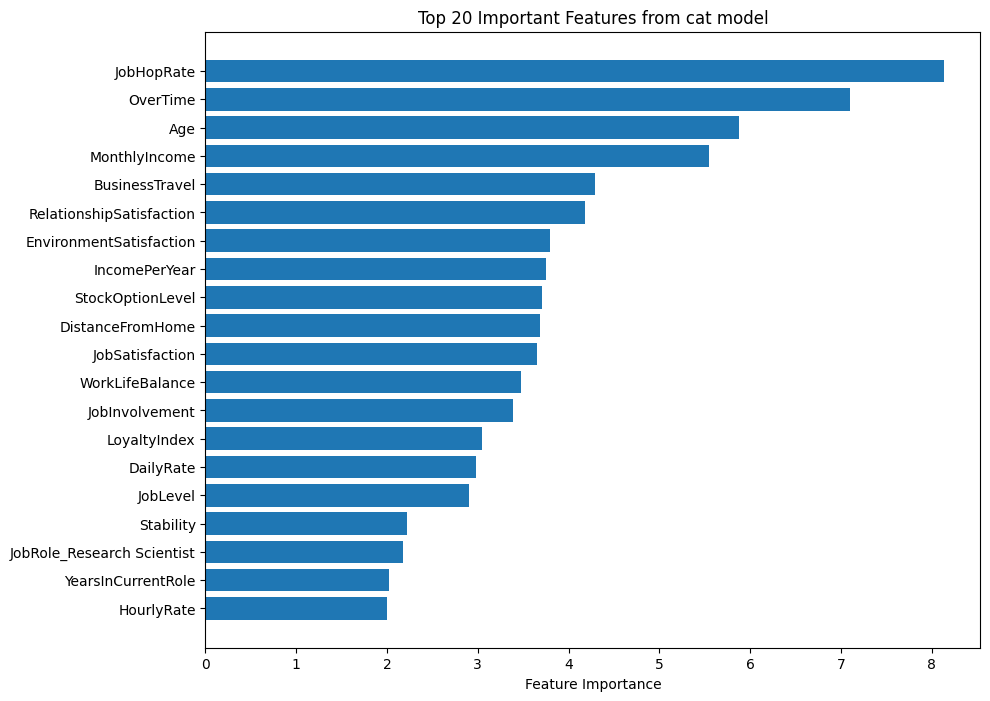

xgb


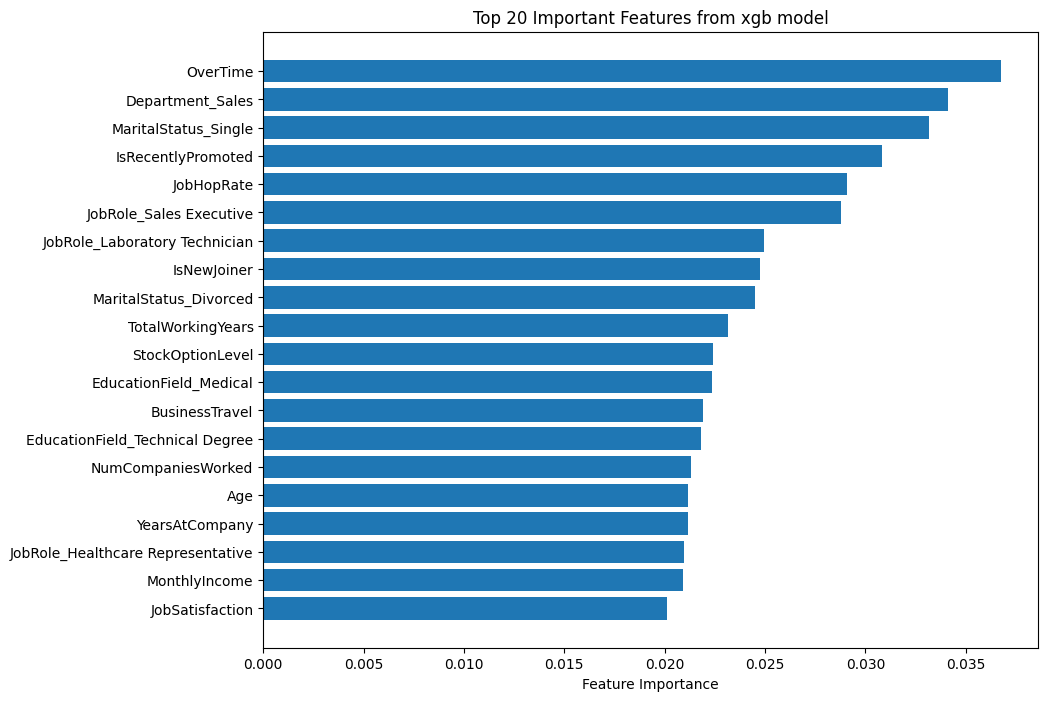

In [41]:

for name, estimator in model_loaded.named_estimators_.items():
    print(name)
    importances = estimator.feature_importances_

    feature_names = joblib.load("model_columns.pkl")

    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Importance'][:20][::-1])
    plt.xlabel("Feature Importance")
    plt.title(f"Top 20 Important Features from {name} model")
    plt.show()


## Feature importance combined

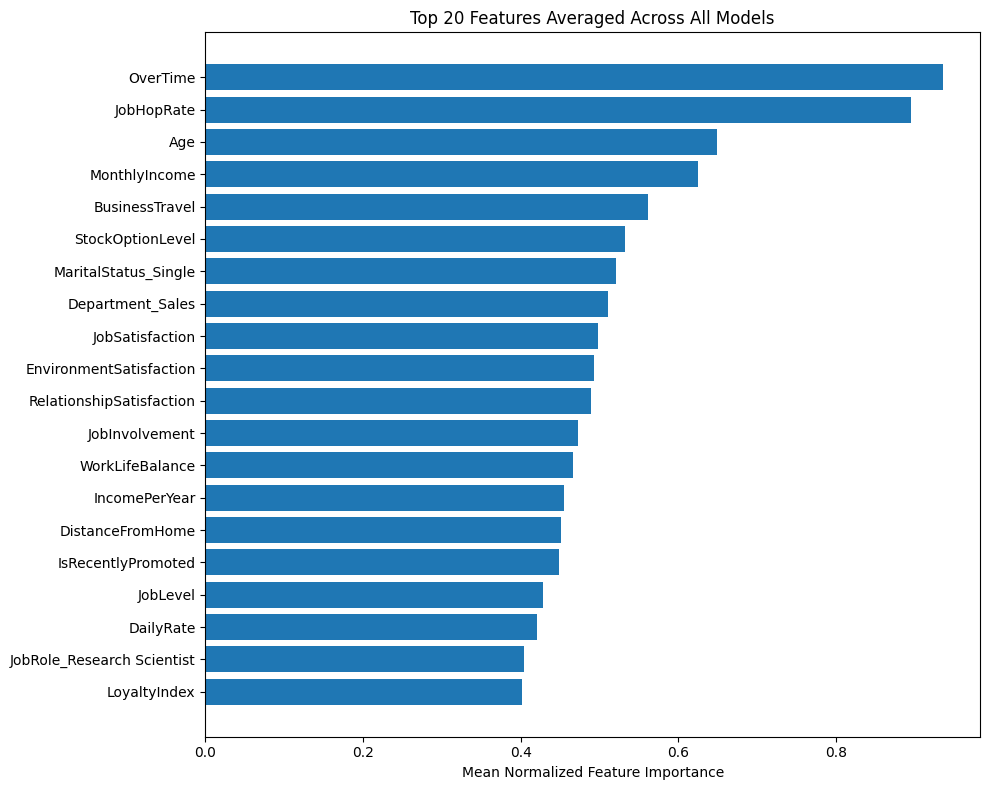

In [42]:
# Load feature names
feature_names = joblib.load("model_columns.pkl")
all_importances = []

# Collect normalized feature importances from each model
for name, estimator in model_loaded.named_estimators_.items():
    if hasattr(estimator, "feature_importances_"):
        importances = estimator.feature_importances_
        # Normalize importances from 0 to 1
        norm_importances = (importances - np.min(importances)) / (np.max(importances) - np.min(importances))
        all_importances.append(norm_importances)

# Convert list to numpy array (shape: [n_models, n_features])
all_importances = np.array(all_importances)

# Compute mean importance across models
mean_importances = np.mean(all_importances, axis=0)

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Normalized Importance': mean_importances
}).sort_values(by='Mean Normalized Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Mean Normalized Importance'][:20][::-1])
plt.xlabel("Mean Normalized Feature Importance")
plt.title("Top 20 Features Averaged Across All Models")
plt.tight_layout()
plt.show()

### Observations

* overtime, job hop rate , monthly income etc are features that contribute to high attrition